# <b>An investigation into Singapore's Sky-High Resale Public Housing Prices</b>

<img src='https://www.hdb.gov.sg/cs/infoweb/-/media/HDBContent/Images/SCEG/Confidential-InfoWEB_Mobile.ashx' width='100%'>

# __Disclaimer__

This notebook is still a work-in-progress. Do visit this page for updates. You can also find this notebook in my [github][github] and [kaggle][kaggle] pages.

[github]: https://github.com/lzytimx/Portfolio/blob/main/hdb_flats_analysis/hdb_analysis.ipynb
[kaggle]: https://www.kaggle.com/code/lzytim/a-deep-dive-into-singapore-s-property-prices#Table-of-Contents

# __TL:DR__

The [expenditure-to-disposable-income ratio][oecd-affordability-indicators] is used as the chief criteria for determining public housing affordability. If households have an expenditure-to-income ratio of more than <b>30%</b> (i.e. they spend more than 30% of their disposable income on housing), housing are said to be "unaffordable", and households are overburdened by housing costs. The 30% criteria takes reference from [HDB's monthly installment][hdb-loan-cap] limit. The expenditure-to-disposable-income ratio was calculated for the first to ninth decile of household incomes amongst the varying flat types in Singapore.

Some important findings are:
- The expenditure-to-disposable-income ratio of the first decile household income earner intending to pursue home ownership of a <b>median-priced 2-room flat</b> is <b>0.0</b>.
- The expenditure-to-disposable-income ratio of the first decile household income earner intending to pursue home ownership of a <b>median-priced 3-room flat</b> is <b>0.1</b>.
- The expenditure-to-disposable-income ratio of the first decile household income earner intending to pursue home ownership of a <b>median-priced 4-room flat</b> is <b>0.37</b>.

As an interesting side note, the highest-priced HDB flat sold to date (SGD 1.58 million) can actually be afforded by the 6th-decile household income earner (expenditure-to-disposable-income ratio of 0.22). 

The findings, especially pertaining to income earners of the lowest decile, reflect the success of the government's policy in ensuring affordability across the spectrum of affluence even in the resale market. Hence, we conclude that the HDB and the Singapore government has successfully maintained housing affordability for the common Singaporean man.

[oecd-affordability-indicators]: https://www.oecd.org/els/family/HC1-5%20Overview%20of%20affordable%20housing%20indicators.pdf
[hdb-loan-cap]: https://www.hdb.gov.sg/residential/buying-a-flat/understanding-your-eligibility-and-housing-loan-options/housing-loan-options/housing-loan-from-hdb

# __Foreword__

## Singapore's Public Housing Story

The year was 1956 and Singapore was faced with an explosive population growth. Exacerbating the situation, the housing authority at that time - the Singapore Improvement Trust (__"SIT"__), simply could not keep up. While the SIT was building more infrastructure to house the population, these were too expensive to build, too expensive to afford by the largely impoverished populace, and the rate at which these buildings were built was too slow to keep up with demand.  People had to reside in makeshift houses and slums, where amenities that we take for granted now - sanitation, the availability of water, and adequate living space, were absent. The government first mooted the [dissolution of the SIT][hansard-1956] to make way for another housing authority, whose mandate was shifted to quicken the removal of slums, and to __accelerate__ the provision of cheap and affordable public housing to house the general populace. The bill was [read][hansard-1958-bill] and passed in 1960. This paved the way for the inception of the Housing Development Board (__"HDB"__) and the HDB would later become [integral][ng-kok-hoe] to the Singapore success story. In 2024, a respectable [78%][home-ownership] of Singaporeans reside in public housing apartments (henceforth known as flats). Even more impressive, [89.7%][home-ownership] of Singaporeans own their own homes, a feat that is in stark constrast to other countries.

Today, the Singapore government and HDB tries to keep housing affordable is through the [Build-to-Order ("BTO") scheme][bto-scheme] (or simply BTO), the 99-year lease, and a slew of [grants][grants] to ensure affordability for Singaporeans to pursue their home ownership goals. The BTO scheme uses an approach where flats are not built until an order of the flat is received. These (unbuilt) flats are sold directly from the HDB to the home buyers, and [prices are set][hdb-bto-pricing] using internal guidelines. Because BTOs are not subject to market forces, they are usually priced relatively cheaper compared to flats found in the resale market. 

However, there are some crucial disadvantages to BTOs. They are typically built in newer towns where amenities might be initially scant, and the duration taken to travel to the city center is relatively longer and thus more inconvenient. In the off-chance when BTOs are built in matured estates with established shopping centers and recreational facilities aplenty, these tend to be oversubscribed and are typically sold at a premium. Since they are made to order, there is a [3-to-4-year waiting time][waiting-time] to build ordered flats from scratch, and home buyers have to make interim living arrangements during this 3-4 year construction window. 

## Is public housing <i>really</i> affordable?

From this [website][bto-prices], one can observe how new BTO project prices increase across (1) favourable disticts, (2) larger flats, and (3) across years. Take the example of a BTO project at Tanglin Halt Courtyard (Queenstown) which is located in a favourable distict. A 4-room HDB flat could go as high as SGD 712,000. In contrast, the BTO Matilda Riverside Punggol project priced a 3-room HDB flat at up to  SGD 296,000. One can appreciate the discomfort (to the extent of anger) of the common Singaporean couple when they are asked to fork out SGD 700,000 for a (typically 100-sqm or so) 4-room public housing flat from an institution whose mandate is to provision cheap and affordable flats. There is simply no more alternatives for home ownership (with the exception of rentals) if one is unable to afford the cheaper, but nonetheless significant SGD 296,000 price tag on the smaller 3-room HDB flat in a less favourable district through the BTO scheme.

If a home buyer is unable to commit to the 3-4 year waiting time and requires a flat in short notice, s/he will have to purchase a flat from the __resale market__. An extremely crude google search show news articles detailing how resale flats prices have successively broken records in [June (1.5 million)][tiong-bahru], [July (1.42 million)][toa-payoh-2] and [November (1.56 million)][toa-payoh]. With the ever-increasing prices by both the HDB and the resale market, many have understandably questioned whether the HDB is still adhering to its core mission; which is to provide __affordable__ housing to the Singaporean core. 

## The burning question of affordability

What we will be examining in this notebook is the prices of the HDB flats __resale market__ from 2017 to 2024. Data was obtained from this [website][data]. The block number and street name in the dataset were further fed into [Onemap][onemap] (Singapore's authoritative national map) to retrieve the x and y coordinates for geospatial plotting. 

The ultimate goal for this work, therefore, is to attempt a deep-dive on public housing property prices in the resale market across the years, and to gain some insights about the affordability of public housing in Singapore. Through this work, We aim to answer this burning question - whether public housing in Singapore is continues to be affordable, or is no longer priced for the common Singaporean man.

We will also be scrutinising the numbers and conclusions put forth by this [news article][news-article] which is a report on [HDB press release][hdb-press-release] on the public housing resale market.

[waiting-time]: https://www.hdb.gov.sg/about-us/news-and-publications/press-releases/HDB-Launches-5714-Flats-in-Feb-2024-BTO-and-SBF-Exercises#:~:text=Five%20out%20of%20the%20seven,Balance%20Flats%20(SBF)%20exercises.
[hdb-bto-pricing]: https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/How-BTO-Flats-are-Priced#:~:text=First%2C%20HDB%20establishes%20the%20market,individual%20attributes%20of%20the%20flats.&text=Projects%20with%20locational%20advantages%20will,to%20city%20or%20town%20centre
[grants]: https://www.mof.gov.sg/docs/librariesprovider3/budget2023/download/pdf/annexe1.pdf
[bto-scheme]: https://en.wikipedia.org/wiki/Build_to_order_(HDB)
[bto-prices]: https://www.propertyguru.com.sg/property-guides/ultimate-list-of-bto-flat-prices-54099
[home-ownership]: https://smartwealth.sg/housing-household-statistics-singapore/#:~:text=The%20home%20ownership%20rate%20in%20Singapore%20was%2089.7%25%20in%202023.&text=Over%20the%20past%2010%20years%2C%20the%20home%20ownership%20rate%20has,ownership%20rates%20in%20the%20world.
[hansard-1956]: https://sprs.parl.gov.sg/search/#/topic?reportid=003_19550422_S0003_T0003
[hansard-1958-bill]: https://sprs.parl.gov.sg/search/#/topic?reportid=020_19580910_S0003_T0007
[ng-kok-hoe]: https://lkyspp.nus.edu.sg/docs/default-source/gia-documents/public-housing-policy-in-singapore_with-graphics(1).pdf?sfvrsn=7c4b6c0a_2
[pub-housing-stats]: https://smartwealth.sg/housing-household-statistics-singapore/
[toa-payoh]: https://mothership.sg/2023/11/the-peak-1-5-million-toa-payoh/
[tiong-bahru]: https://mothership.sg/2023/06/tiong-bahru-hdb-record-sale/
[toa-payoh-2]: https://mothership.sg/2023/07/toapayoh-hdb-record-sale-2023/
[cooling-measures]: https://www.channelnewsasia.com/singapore/cooling-measures-singapore-hdb-resale-prices-towns-property-map-3499961
[indranee-interview]: https://www.youtube.com/watch?v=q4X_o5A_ygc
[data]: https://beta.data.gov.sg/collections/189/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view
[onemap]: https://www.onemap.gov.sg
[hdb-press-release]: https://www.hdb.gov.sg/about-us/news-and-publications/press-releases/Q12024RPI
[news-article]: https://www.straitstimes.com/singapore/housing/hdb-resale-prices-up-17-in-q1-higher-than-11-rise-in-previous-quarter
[tiong-bahru-158m]: https://www.asiaone.com/money/new-hdb-resale-record-5-room-flat-tiong-bahru-sold-158m
[2-milion-toapayoh]: https://www.asiaone.com/singapore/its-worth-price-10-enquiries-received-2m-toa-payoh-flat-listing-says-agent

# __Table of Contents__

#### 0. Loading packages and datasets

#### 1. Broad Information of units sold
- How many flats are sold each year?
- What flat types and flat models are sold year year?
- How many flats are sold in each town?

#### 2. Flat prices are increasing!
- What is the increase in average prices across the years? CAGR, percentage increase?
- What is the distribution of resale flats
- Prices in 2023 depicted with a choropleth

#### 3. Million Dollar Flats!
- How many million dollar flats are sold each year?
- Flat model and flat types of million dollar homes, as well as towns.
- Remaining lease information

#### 4. Answering the question of affordability
- Indicators for affordable housing

#### 5. Some bivariate analysis
- pairplot, correlation matrix

#### 6. Multivariate analysis, Machine Learning
- 2 Simple models, linear regression (maybe lasso/ridge?) and random forests

# __0. Loading Packages and Datasets__

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , FunctionTransformer
from sklearn.compose import ColumnTransformer
import geopandas as gpd
import requests
import time
import datetime as dt
import math

In [2]:
# plt.style.available
sns.set_theme(rc={'axes.formatter.limits':(-8,9)})
plt.style.use("seaborn-v0_8-notebook")

In [78]:
# Loading resale flat transactions dataset
try:
    kaggle_file_loc = "../input/hdb-resale-prices/resale_hdb_price_coords.csv"
    df = pd.read_csv(kaggle_file_loc, parse_dates=["month"], index_col=0)
except:
    github_file_loc = "../datasets/resale_hdb_price_for_kaggle_2024-01sep.csv"
    df = pd.read_csv(github_file_loc, parse_dates=["month"], index_col=0)

df['year'] = df['month'].dt.year
# bins = pd.IntervalIndex.from_tuples([(40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)])
# df['lease_cat'] = pd.cut(df["lease_years"], bins)

In [ ]:
# API
# https://data.gov.sg/api/action/datastore_search?resource_id=d_8b84c4ee58e3cfc0ece0d773c8ca6abc

# __1. Number of Resale Flats Sold__

The number of resale flats transacted peaked at 2021 before tapering off.

In [4]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Y")])
    .size()
    .reset_index()
)
data = data.rename(columns={"month": "year", 0: "count"})
data["year"] = data["year"].dt.year
data = data.iloc[:-1, :]
data['pct_chg'] = round(data['count'].pct_change() * 100, 2)
# data

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/4084495722.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Y")])


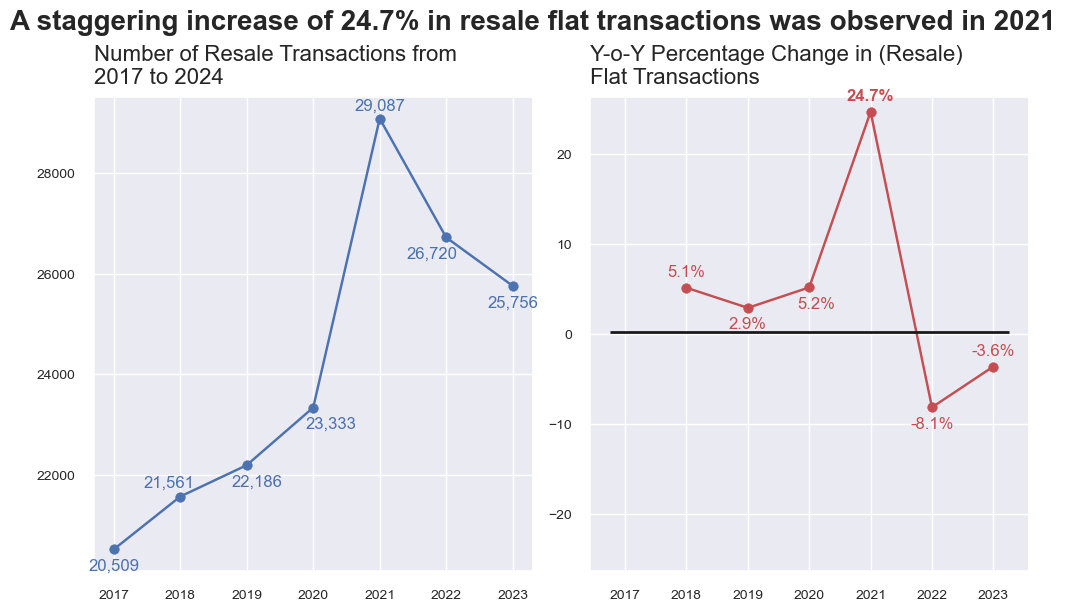

In [5]:
x_axis = data['year']
y_axis = data['count']
y2_axis = data['pct_chg']

color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

ax.flatten()[0].plot(x_axis, y_axis)
ax.flatten()[0].scatter(x_axis, y_axis)
ax0_str = "Number of Resale Transactions from\n2017 to 2024"
ax.flatten()[0].set_title(ax0_str, loc='left', size=16, pad=10)
x_list, y_list = ax.flatten()[0].lines[0].get_data()

# Annotation
for x_val, y_val, value in zip(x_list, y_list, y_axis):
    value = f"{value:,.0f}"
    if y_val == 29087:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(0, 6), textcoords='offset points', ha='center', color=color_wheel[0])
    elif y_val == 21561:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(-8, 7), textcoords='offset points', ha='center', color=color_wheel[0])
    elif y_val == 22186:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(7, -15), textcoords='offset points', ha='center', color=color_wheel[0])
    elif y_val == 23333:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(13, -15), textcoords='offset points', ha='center', color=color_wheel[0])
    elif y_val == 26720:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(-10, -15), textcoords='offset points', ha='center', color=color_wheel[0])
    else:
        ax.flatten()[0].annotate(value, xy=(x_val, y_val), xycoords='data', xytext=(0, -15), textcoords='offset points', ha='center', color=color_wheel[0])

# ax.flatten()[0].grid(None)
# ax.flatten()[0].set_facecolor('white')


ax.flatten()[1].plot(x_axis, y2_axis, c=color_wheel[3])
ax.flatten()[1].scatter(x_axis, y2_axis, color=color_wheel[3])
ax.flatten()[1].set_title("Y-o-Y Percentage Change in (Resale)\nFlat Transactions", loc='left', size=16, pad=10)
x_list, y_list = ax.flatten()[1].lines[0].get_data()

for x2, y2, value in zip(x_list, y_list, y2_axis):
    value = f"{value:.1f}%"
    if x2 == 2018:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(0, 8), textcoords='offset points', ha='center', color=color_wheel[3])
    elif x2 == 2019:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(0, -15), textcoords='offset points', ha='center', color=color_wheel[3])
    elif x2 == 2020:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(5, -15), textcoords='offset points', ha='center', color=color_wheel[3])
    elif x2 == 2021:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(0, 8), textcoords='offset points', ha='center', color=color_wheel[3], weight='bold')
    elif x2 == 2022:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(0, -15), textcoords='offset points', ha='center', color=color_wheel[3])    
    else:
        ax.flatten()[1].annotate(value, xy=(x2, y2), xycoords='data', xytext=(0, 8), textcoords='offset points', ha='center', color=color_wheel[3])

# ax.flatten()[1].grid(None)
# ax.flatten()[1].set_facecolor("white")

# centering y=0 in the middle of the graph
max_ylim = max(np.abs(ax.flatten()[1].get_ylim()))
ax.flatten()[1].set_ylim(-max_ylim, max_ylim)
ax.flatten()[1].hlines(y=0.2, xmin=2016.75, xmax=2023.25, linewidth=2, color='k')

ax.flatten()[1].set_xticks(range(2017, 2023+1))

fig_title = "A staggering increase of 24.7% in resale flat transactions was observed in 2021"
fig.suptitle(fig_title, ha='center', size=20, weight='bold');

Model A seems has consistently been the most popular HDB flat model to be sold

In [6]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Y"), "flat_model"])
    .size()
    .reset_index()
)
data = data.rename(columns={"month": "year", 0: "count"})
data["year"] = data["year"].dt.year
data_pivot = data.pivot_table(index="flat_model", columns="year", values="count")
data_pivot = data_pivot.iloc[:, :-1]
data_pivot = data_pivot.sort_values(by=2023, ascending=False)

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/3499938943.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Y"), "flat_model"])


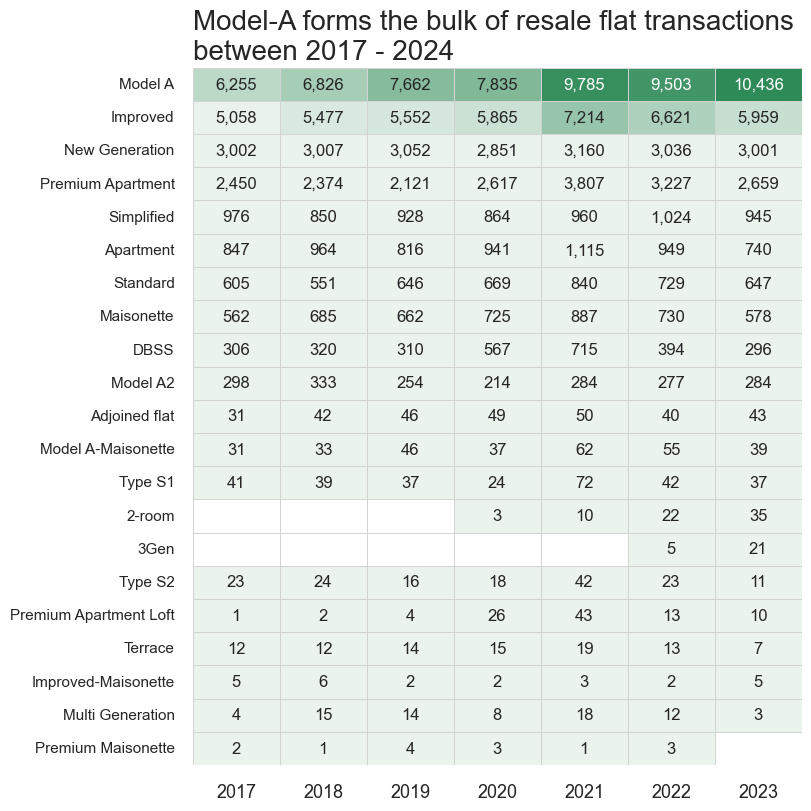

In [7]:
labels = data_pivot.map(lambda x: f"{x:,.0f}" if not np.isnan(x) else "0")
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=5000,
    vmax=10000,
    annot=labels,
    fmt='',
    cbar= None
)
ax.grid(None)
ax.set_facecolor('white')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Model-A forms the bulk of resale flat transactions\nbetween 2017 - 2024", size=20, loc='left')
ax.set_yticklabels(ax.get_yticklabels(), size=11);
ax.set_xticklabels(ax.get_xticklabels(), size=13);

The 3-room, 4-room, and 5-room flats are the most popular flat variants

In [8]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Y"), "flat_type"])
    .size()
    .reset_index()
)
data = data.rename(columns={"month": "year", 0: "count"})
data["year"] = data["year"].dt.year
data_pivot = data.pivot_table(index="flat_type", columns="year", values="count")
data_pivot = data_pivot.iloc[:, :-1]
data_pivot = data_pivot.sort_index()
# data_pivot

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/1135452760.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Y"), "flat_type"])


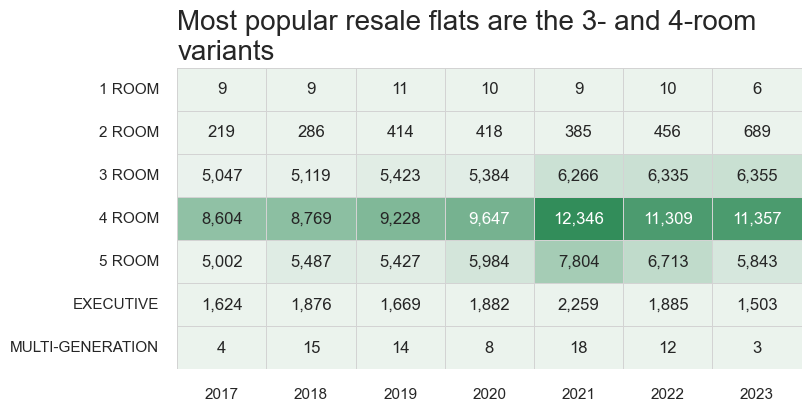

In [9]:
labels = data_pivot.map(lambda x: f"{x:,.0f}" if not np.isnan(x) else "0")
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=5000,
    vmax=12500,
    annot=labels,
    fmt="",
    cbar=None,
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(
    "Most popular resale flats are the 3- and 4-room\nvariants",
    size=20,
    loc="left",
)
ax.set_yticklabels(ax.get_yticklabels(), size=11);
ax.set_xticklabels(ax.get_xticklabels(), size=11);

In [10]:
data = df.groupby(by=[pd.Grouper(key="month", freq="Y"), "town"]).size().reset_index()
data = data.rename(columns={"month": "year", 0: "count"})
data["year"] = data["year"].dt.year
data_pivot = data.pivot_table(index="town", columns="year", values="count")
data_pivot = data_pivot.iloc[:, :-1]
data_pivot = data_pivot.sort_values(by=2023, ascending=False)
# data_pivot

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/725426124.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = df.groupby(by=[pd.Grouper(key="month", freq="Y"), "town"]).size().reset_index()


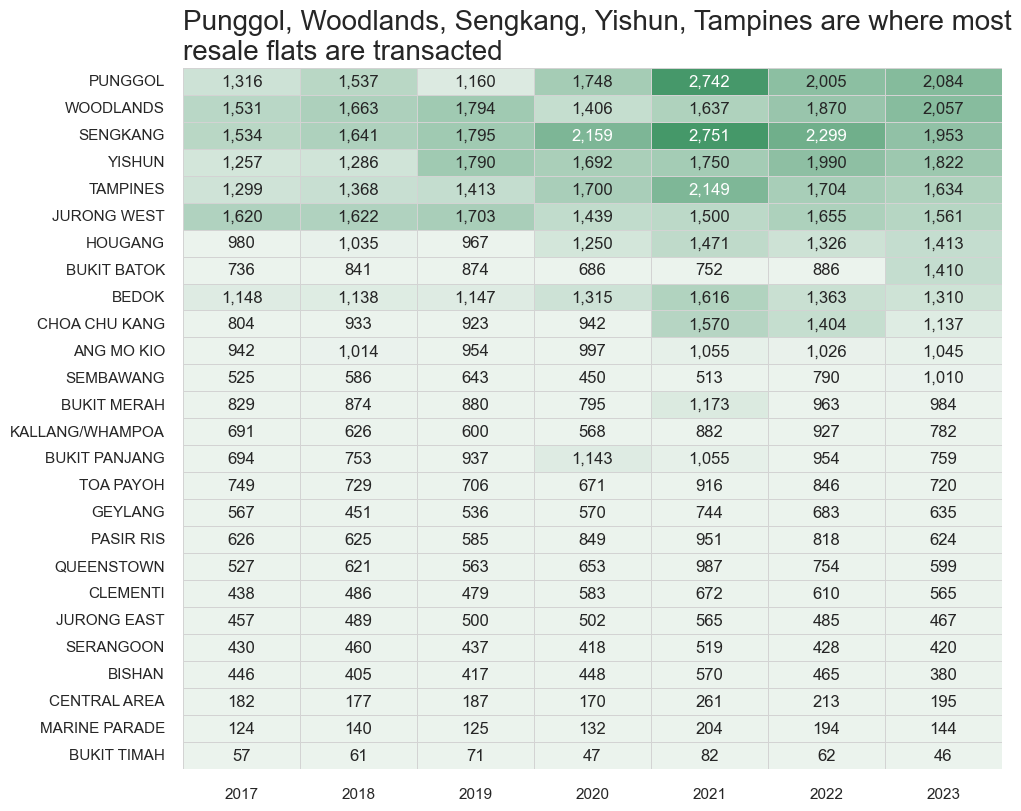

In [11]:
labels = data_pivot.map(lambda x: f"{x:,.0f}" if not np.isnan(x) else "0")
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=1000,
    vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(
    "Punggol, Woodlands, Sengkang, Yishun, Tampines are where most\nresale flats are transacted",
    size=20,
    loc="left",
)
ax.set_yticklabels(ax.get_yticklabels(), size=11);
ax.set_xticklabels(ax.get_xticklabels(), size=11);

There are some overlaps between flat model and flat type. For instance, only <b>2 ROOM</b> flat type can have the 2-room flat model, the <b>MULTI-GENERATION</b> flat type can have the Multi Generation flat model. There is also little information about the Improved-Masisonette, Maisonette, Model A-Maisonette flat types, so it is difficult to understand the subtleties between different flat models. In this study, we will pay lesser attention to flat models and focus on flat types instead.

In [12]:
data = df.query("year == 2023")
data = data.groupby(by=["flat_model", "flat_type"])['resale_price'].agg(['median', 'count'])
data_pivot = data.pivot_table(index="flat_type", columns="flat_model", values=['median', 'count'])
# data_pivot

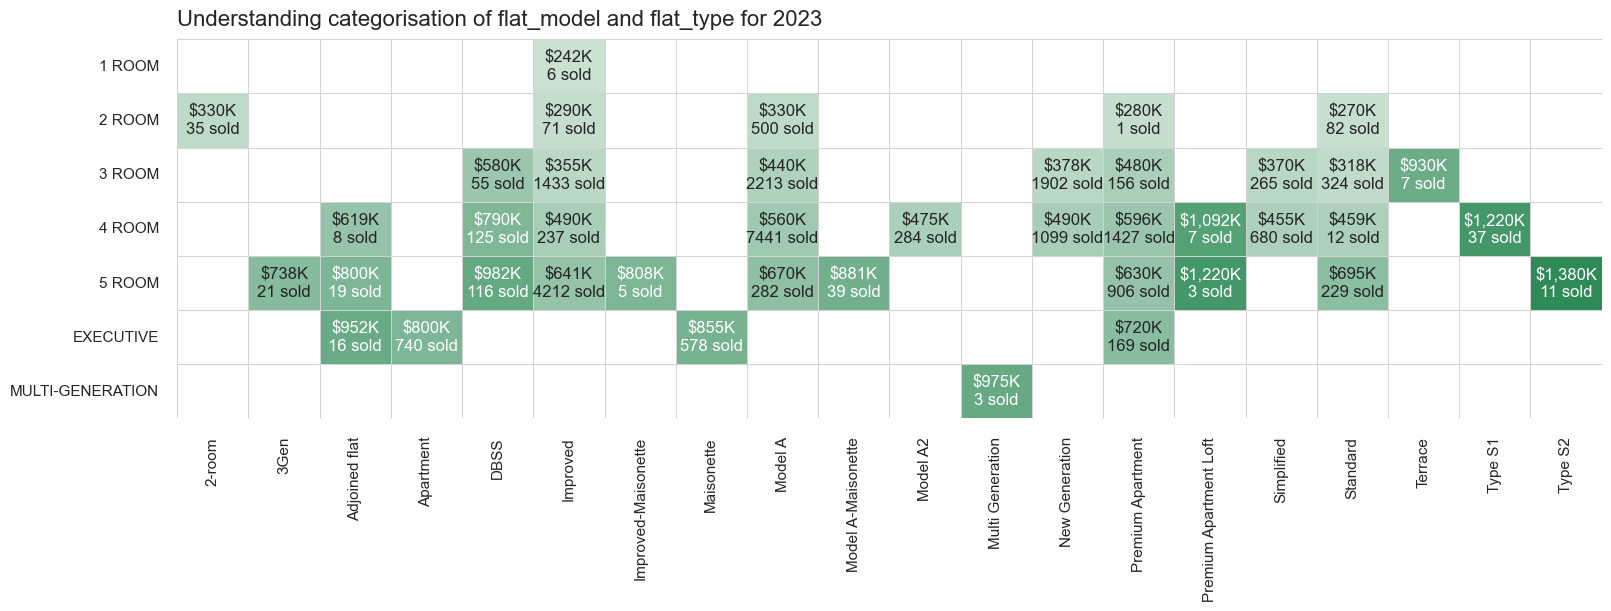

In [13]:
test1 = data_pivot.loc[:, ("count")]
test2 = data_pivot.loc[:, ("median")]
test3 = pd.concat([test1, test2]).groupby(level=0).agg(list)
labels = test3.map(lambda x: f"${x[1]/1000:,.0f}K\n{x[0]:.0f} sold")

seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(16, 6), constrained_layout=True)
sns.heatmap(
    data_pivot['median'],
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=1000,
    # vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticklabels(ax.get_yticklabels(), size=11)
ax.set_xticklabels(ax.get_xticklabels(), size=11)
ax.xaxis.set_label_position('top')

ax.set_title(
    "Understanding categorisation of flat_model and flat_type for 2023",
    size=16,
    loc="left",
    pad=10
);

In [15]:
data = df.groupby(['year', 'flat_type'])[['resale_price']].agg({'resale_price':['min', 'max']}).reset_index().sort_values(['flat_type', 'year'])
data['resale_min'] = data.loc[:, ("resale_price", 'min')]
data["resale_max"] = data.loc[:, ("resale_price", "max")]
data = data.drop('resale_price', axis=1)

flat_min = data.pivot_table(index="flat_type", columns="year", values='resale_min')
flat_max = data.pivot_table(index="flat_type", columns="year", values="resale_max")
flat_both = pd.concat([flat_min, flat_max]).groupby(level=0).agg(list)
labels = flat_both.map(lambda x: f"${x[0]/1000:,.0f}K\n${x[1]/1000:,.0f}K")


/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/351170091.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop('resale_price', axis=1)


Interestingly, the 5-room HDB flats are the most expensive of the lot, even though the executive and multi-generation models are bigger.

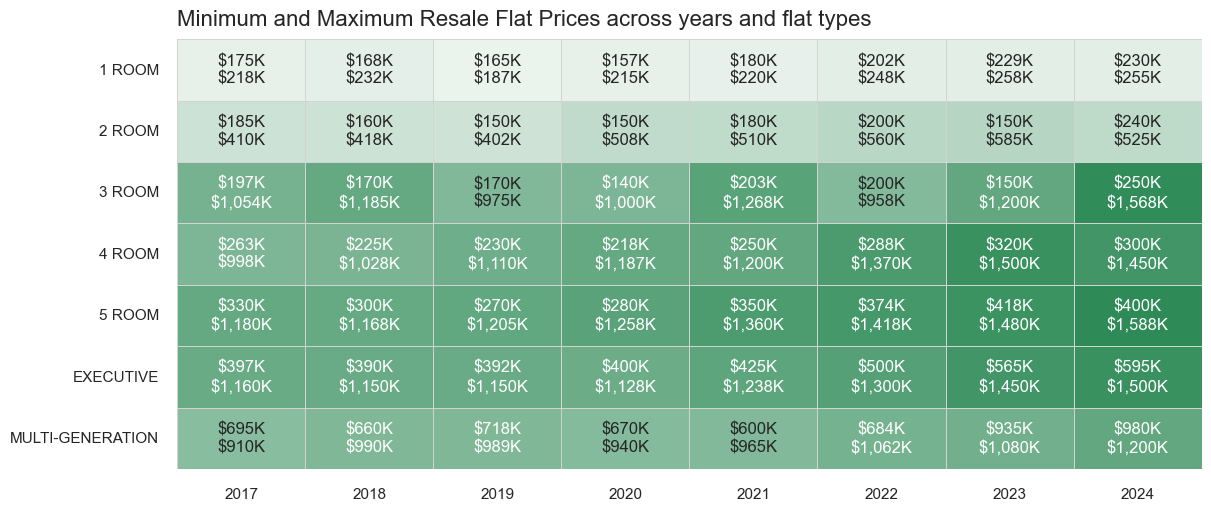

In [16]:
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)
sns.heatmap(
    flat_max,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    # vmin=1000,
    # vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
    annot_kws={"ha": "center"},
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks(ax.get_xticks())
ax.set_yticklabels(ax.get_yticklabels(), size=11)
ax.set_xticklabels(range(2017, 2025), size=11)
ax.xaxis.set_label_position("top")

ax.set_title(
    "Minimum and Maximum Resale Flat Prices across years and flat types",
    size=16,
    loc="left",
    pad=10,
);

One reason for the 5-room flats to be more expensive compared to multi-generation flat types is its location. The bulk of multi-generation flats are sold in Yishun and Tampines. Interestingly, multi-generation flats are transacted in only 3 towns while 1-room flats are only in 1 town. Perhaps the number of owned 1-room flats are lesser compared to the other flat variants

In [17]:
data = df.copy()
data = data.groupby(by=["town", "flat_type"]).size().reset_index()
data_pivot = data.pivot_table(index="flat_type", columns="town", values=0)
# data_pivot

Text(0.0, 1.0, 'Flat Transactions across towns and flat types')

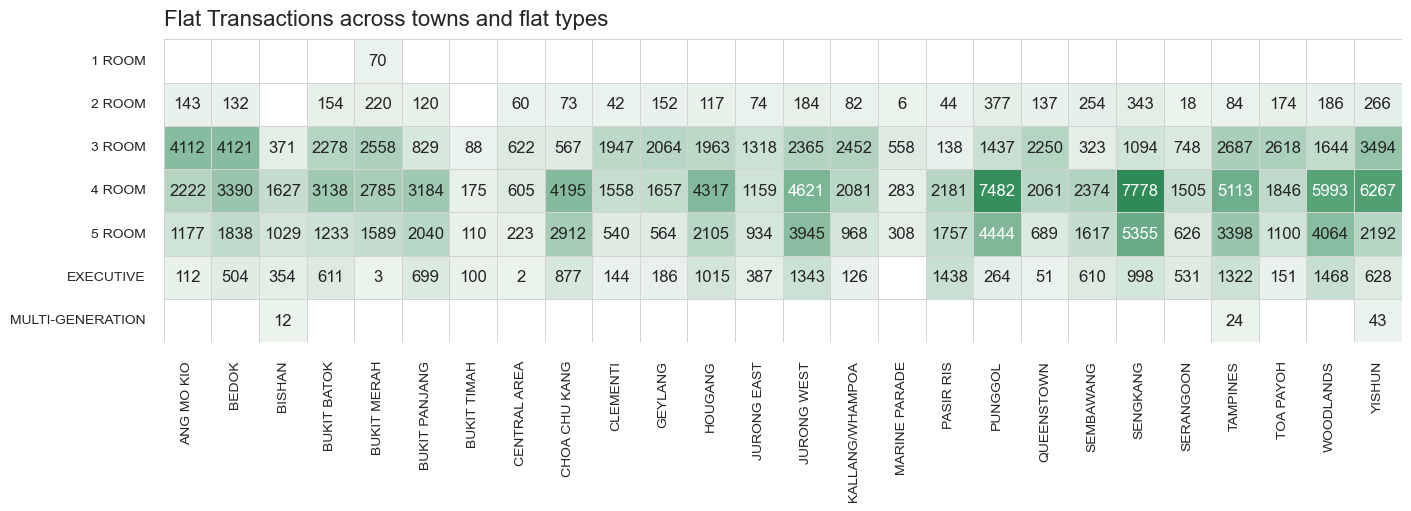

In [18]:
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)
labels = data_pivot.map(lambda x: f"{x:.0f}")

fig, ax = plt.subplots(figsize=(14, 5), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    # vmin=1000,
    # vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
    annot_kws={"ha": "center"},
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
# ax.set_xticks(ax.get_xticks())
# ax.set_yticklabels(ax.get_yticklabels(), size=11)
# ax.set_xticklabels(range(2017, 2025), size=11)
# ax.xaxis.set_label_position("top")

ax.set_title(
    "Flat Transactions across towns and flat types",
    size=16,
    loc="left",
    pad=10,
)

Despite an average space difference of 500 square feet, we see a SGD 300,000 price difference between the maximum price paid for a 5-room HDB flat compared to a multi-generation flat. This emphasises the value placed to own a flat in a favourable district.

In [19]:
data = df.groupby("flat_type")[['floor_area_sqm']].agg('mean')
data["floor_area_sqft"] = data["floor_area_sqm"] * 10.7639
# data

Text(0.0, 1.0, 'Average size of flats')

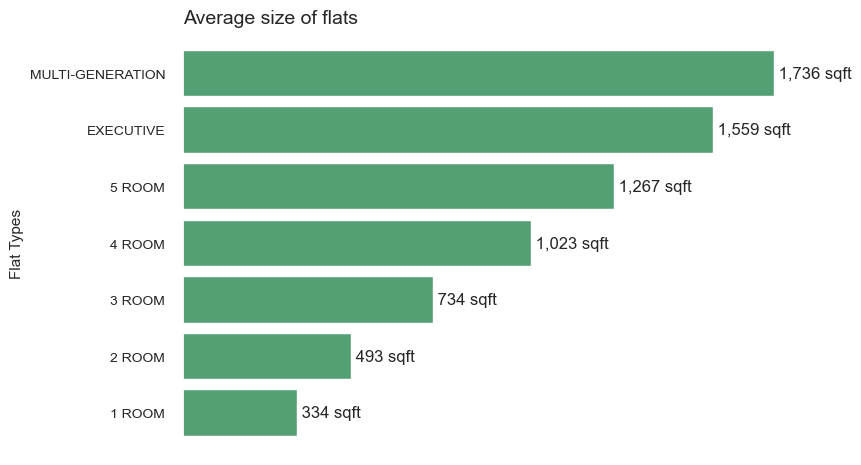

In [20]:
seagreen_palette = sns.light_palette("seagreen")

y = data.index
width = data['floor_area_sqft']

fig, ax = plt.subplots()

ax.barh(y, width, color=seagreen_palette[4])
ax.bar_label(ax.containers[0], label_type="edge", fmt=lambda x: f" {x:,.0f} sqft");

ax.grid(None)
ax.set_facecolor('white')
ax.set_xticks([])
ax.set_ylabel("Flat Types")

title_str = "Average size of flats"
ax.set_title(title_str, loc='left', size=14)

# __2. Resale Flat Prices are Rising__

In [21]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Y")])["resale_price"]
    .agg("mean")
    .reset_index()
)
data["pct_change"] = data["resale_price"].pct_change() * 100

latest_value = data.loc[data["month"].idxmax(), 'resale_price']
earliest_value = data.loc[data["month"].idxmin(), "resale_price"]
number_of_years = data.shape[0]
cagr = round((((latest_value / earliest_value) ** (1/number_of_years)) - 1) * 100, 2)
pct_increase = round((latest_value - earliest_value) * 100 / earliest_value, 2)

print(cagr, pct_increase)

3.91 35.93


/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/635572057.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Y")])["resale_price"]


(0.0, 1.0, 0.0, 1.0)

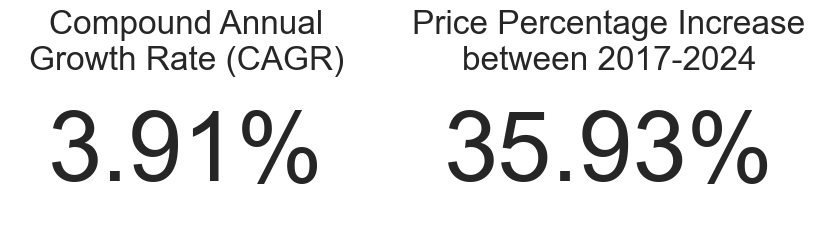

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,2))

ax.flatten()[0].annotate(f"{cagr}%", xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=70)
ax.flatten()[0].set_title("Compound Annual\nGrowth Rate (CAGR)", size=24)
ax.flatten()[0].grid(None)
ax.flatten()[0].set_facecolor('white')
ax.flatten()[0].axis('off')

ax.flatten()[1].annotate(f"{pct_increase}%", xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=70)
ax.flatten()[1].set_title("Price Percentage Increase\nbetween 2017-2024", size=24)
ax.flatten()[1].grid(None)
ax.flatten()[1].set_facecolor("white")
ax.flatten()[1].axis("off")

The Compound Annual Growth Rate (CAGR) is 3.64%, and the percentage increase of property prices from 2017 to 2024 is 33.06%

In [23]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Y")])["resale_price"]
    .agg("mean")
    .reset_index()
)
data["pct_chg"] = data["resale_price"].pct_change() * 100

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/3285929788.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Y")])["resale_price"]


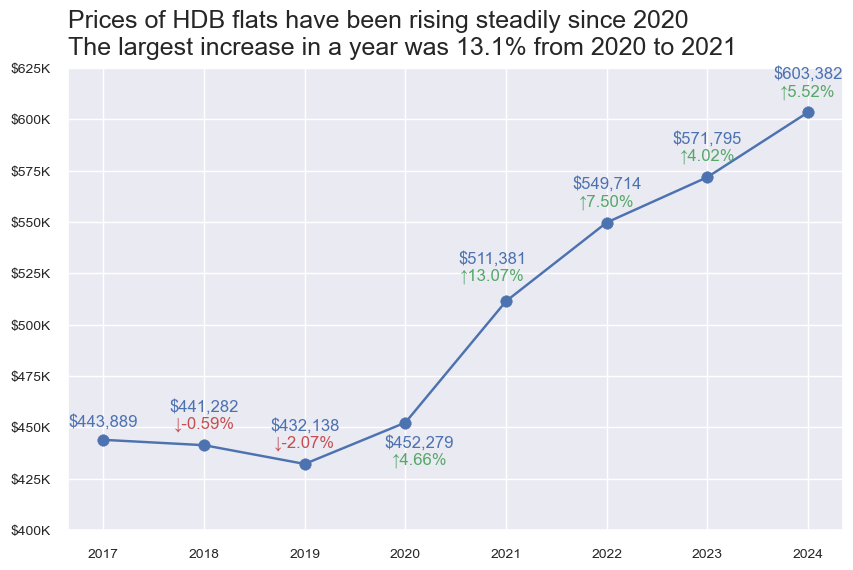

In [24]:
x_axis = data["month"].dt.year
y_axis = data["resale_price"]
y2_axis = data['pct_chg']

color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_axis, y_axis)
ax.scatter(x_axis, y_axis, s=70)

x_list, y_list = ax.lines[0].get_data()

for x, y, pct_chg in zip(x_list, y_list, y2_axis):
    if x == 2017:
        ax.annotate(f"${y:,.0f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
    elif x in [2018, 2019]:
        ax.annotate(f"${y:,.0f}\n", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.annotate(f"\n↓{pct_chg:.2f}%", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[3])
    elif x == 2020:
        ax.annotate(f"${y:,.0f}\n", xy=(x, y), xytext=(10, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(10, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif x == 2021:
        ax.annotate(f"${y:,.0f}\n", xy=(x, y), xytext=(-10, 15), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(-10, 15), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    else:
        ax.annotate(f"${y:,.0f}\n", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])


title_str = "Prices of HDB flats have been rising steadily since 2020 \nThe largest increase in a year was 13.1% from 2020 to 2021"
ax.set_title(title_str, loc="left", pad=10, size=18)

ax.set_yticks(ax.get_yticks());
y_labels = [f"${i/1000:.0f}K" for i in ax.get_yticks()]
ax.set_yticklabels(y_labels);

# ax.axis('off')
# ax.grid(None)
# ax.set_facecolor('white')

Quoted from this [article][news]: <br>
- "It (HDB) added that the HDB resale market is stabilising, noting that resale prices rose __4.9 per cent in 2023__, lower than the __10.4 per cent increase in 2022__, and the __12.7 per cent climb__ in 2021."

Data from our analysis show an increase in resale flat prices of 13.1% (c.f. 12.7%) for 2021, 7.5% (c.f. 10.4%) for 2022, and 4.0% (c.f. 4.9%) in 2023. The results is fairly consistent for 2021, but the difference in percentage is drastic for 2022 and 2023. Do note that there is a differentiation of transaction dates - (1) the date of registration for the resale transactions and the (2) date of approval for the resale transactions. Our data uses the __former__ date, and this is perhaps the reason behind the difference in prices.

Additionally, I would argue that calling a 5% increase in property market a "stabilisation" is a stretch. a 5% increase in resale flat prices should not be classified as "stabilisation" as claimed by HDB. A stabilisation of prices should only be concluded either (1) for price increases below 3%, or (2) if the increase in real wages is in tandem to resale flat price increases (and clearly explained in HDB's press release).

[news]: https://www.straitstimes.com/singapore/housing/hdb-resale-prices-up-17-in-q1-higher-than-11-rise-in-previous-quarter

In [25]:
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Q")])["resale_price"]
    .agg("mean")
    .reset_index()
)
data["pct_chg"] = data["resale_price"].pct_change() * 100
# data

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/2142589803.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.groupby(by=[pd.Grouper(key="month", freq="Q")])["resale_price"]


Text(0.0, 1.0, 'Resale flat prices have been increasing for the 17th consecutive month since 2020Q1')

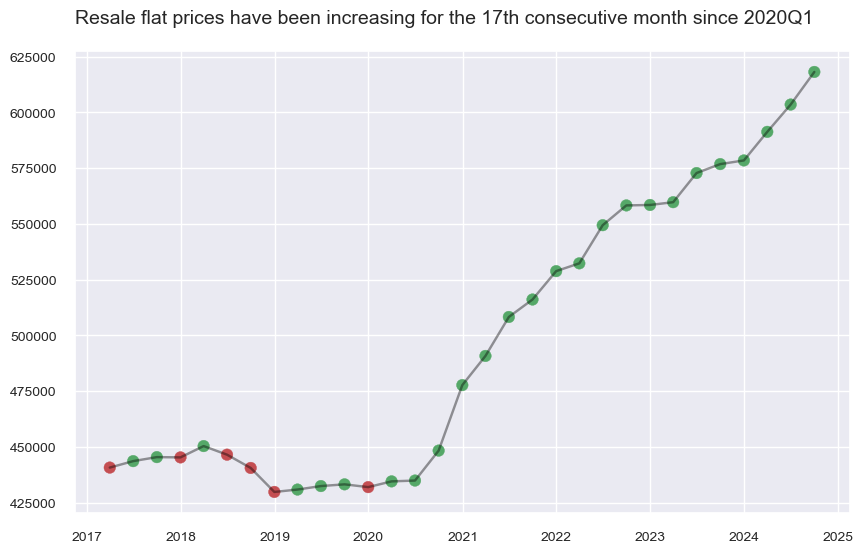

In [26]:
x_axis = data["month"]
y_axis = data["resale_price"]
y2_axis = data["pct_chg"]

color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]
scatter_color = data["pct_chg"].apply(lambda x: color_wheel[2] if x > 0 else color_wheel[3])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_axis, y_axis, color='black', alpha=0.4)
ax.scatter(x_axis, y_axis, s=70, c=scatter_color)

x_list, y_list = ax.lines[0].get_data()

for x, y, pct_chg in zip(x_list, y_list, y2_axis):
    if round(pct_chg, 2) == 2.17:
        ax.annotate(f"{pct_chg:,.2f}%", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2], weight='bold')
    elif round(pct_chg, 2) == 0.28:
         ax.annotate(f"{pct_chg:,.2f}%", xy=(x, y), xytext=(0, -20), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2], weight='bold')

title_str = "Resale flat prices have been increasing for the 17th consecutive month since 2020Q1"
ax.set_title(title_str, loc='left', size=14, pad=20)

Quoted from this [article][news]: <br>

- <i>Prices of Housing Board resale flats inched up __1.7 per cent__ in the first quarter of 2024, rising at a quicker pace than the __1.1 per cent__ growth in the previous quarter.</i>
- <i>This marks the 16th consecutive quarter of price increase since the second quarter of 2020, according to flash estimates released by HDB on April 1.</i>

Our analysis show that this is the 17th consecutive price increase since the first quarter of 2020, and that the increase is 2.17% in 2024Q1 and 0.28% in 2023Q4. The discrepancy for the numbers in 2023Q4 is concerning. The dicrepany for the other 2 figures is reasonable.

[news]: https://www.straitstimes.com/singapore/housing/hdb-resale-prices-up-17-in-q1-higher-than-11-rise-in-previous-quarter

In [27]:
""" Data Prep for Quarter-on-Quarter Price increase
data = (
    df.groupby(by=[pd.Grouper(key="month", freq="Q")])["resale_price"]
    .agg("mean")
    .reset_index()
)
data["pct_chg"] = data["resale_price"].pct_change(4) * 100
data
"""

' Data Prep for Quarter-on-Quarter Price increase\ndata = (\n    df.groupby(by=[pd.Grouper(key="month", freq="Q")])["resale_price"]\n    .agg("mean")\n    .reset_index()\n)\ndata["pct_chg"] = data["resale_price"].pct_change(4) * 100\ndata\n'

/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/mi

Text(0.0, 1.0, 'Violin plot of resale prices every year')

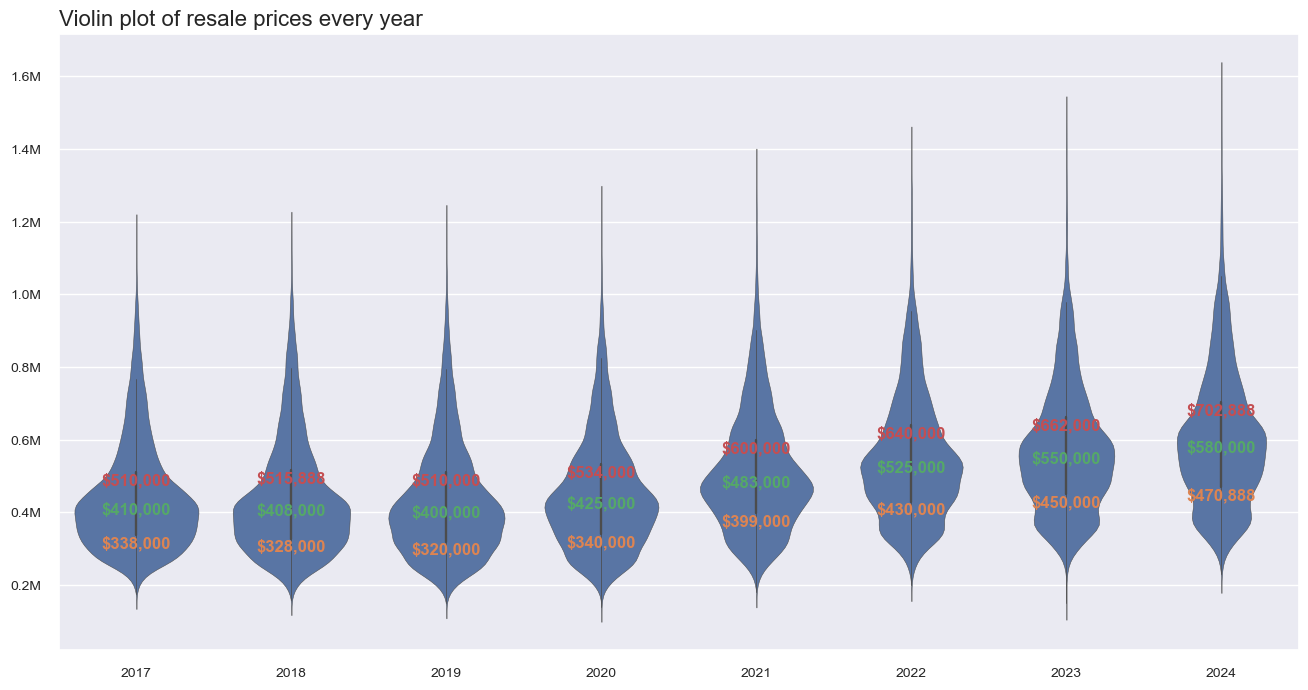

In [28]:
color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]

stats = df.groupby("year")[["resale_price"]].agg("describe")
quan_25 = stats.loc[:, ("resale_price", "25%")].values
quan_50 = stats.loc[:, ("resale_price", "50%")].values
quan_75 = stats.loc[:, ("resale_price", "75%")].values

fig, ax = plt.subplots(figsize=(16, 8))

# sns.violinplot(data=df, x='year', y='resale_price', hue='flat_type', ax=ax)
sns.violinplot(data=df, x="year", y="resale_price", ax=ax, color=color_wheel[0])
ax.ticklabel_format(style="plain", axis="y")
x_axis = ax.get_xticks()


# ax.scatter(x_axis, quan_25)
# ax.scatter(x_axis, quan_50)
# ax.scatter(x_axis, quan_75)

ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels([f"{i/1000000:.1f}M" for i in ax.get_yticks()])
ax.set_ylabel(None);
ax.set_xlabel(None);

for x, y in zip(x_axis, quan_25):
    ax.annotate(f"${y:,.0f}", xy=(x, y), xytext=(0, 0), textcoords='offset points', xycoords='data', ha='center', va='top', color=color_wheel[1], weight='bold')
for x, y in zip(x_axis, quan_50):
    ax.annotate(f"${y:,.0f}", xy=(x, y), xytext=(0, 0), textcoords='offset points', xycoords='data', ha='center', va='center', color=color_wheel[2], weight='bold')
for x, y in zip(x_axis, quan_75):
    ax.annotate(f"${y:,.0f}", xy=(x, y), xytext=(0, 0), textcoords='offset points', xycoords='data', ha='center', va='top', color=color_wheel[3], weight='bold')

title = "Violin plot of resale prices every year"
ax.set_title(title, loc='left', size=16)

The following plot perfectly depicts the skewness of resale HDB prices. In distributions with a right-tailed skew, the use of mean is not a good reflection of central tendencies.

The following plot shows the 25th, 50th (median), and 75th percentile of flat prices. While prices look reasonable, the CAGR and percentage increase figures closely resemble the number calculated above. this shows the uniformity of price increase over the entire resale flat price distribution.

/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/mi

Text(0.0, 1.0, 'Violin Plot of resale prices for each town in 2023')

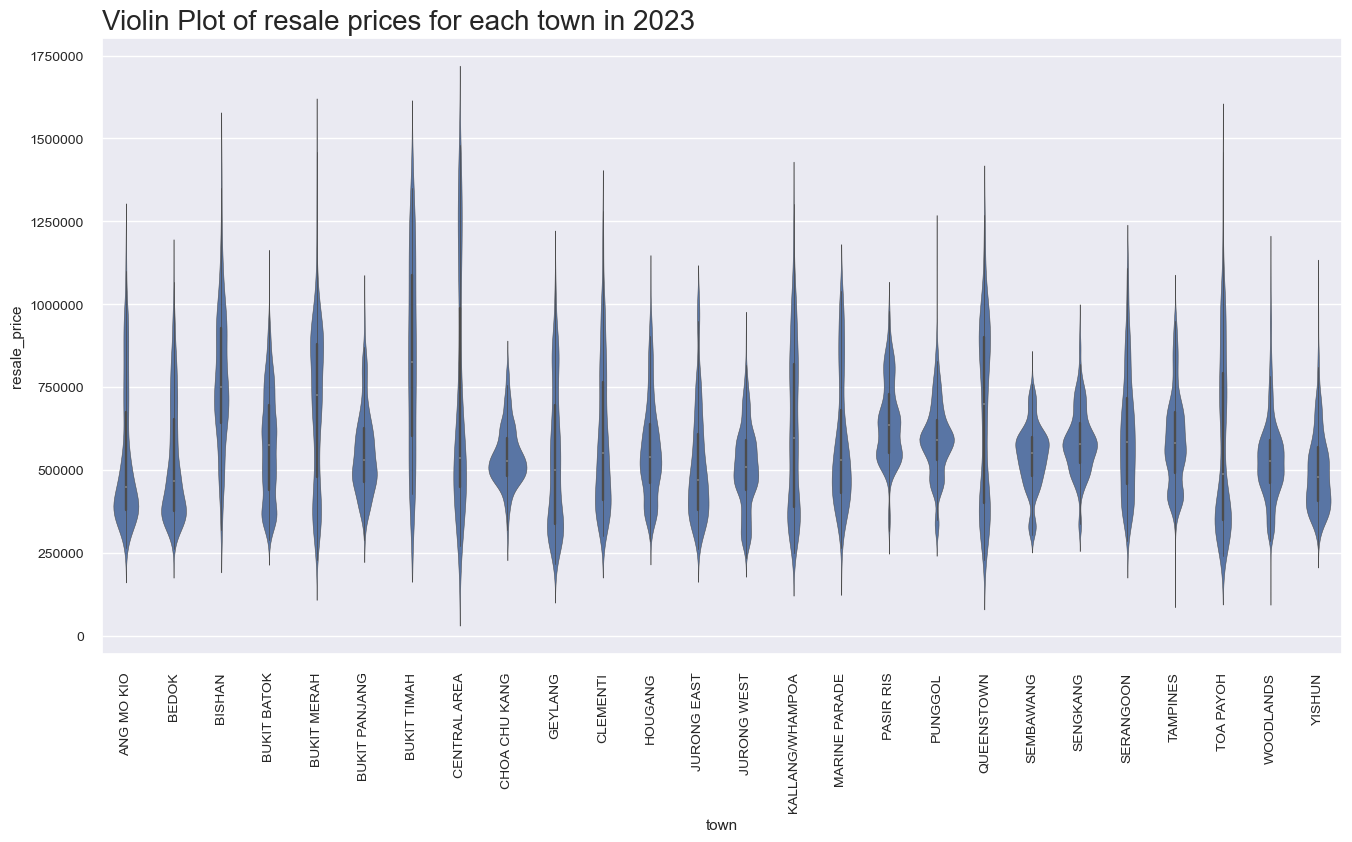

In [29]:
data = df.query("year == 2023")

fig, ax = plt.subplots(figsize=(16, 8))
sns.violinplot(
    data=data,
    x="town",
    y="resale_price",
    ax=ax,
)

ax.tick_params(axis="x", rotation=90)
ax.set_title("Violin Plot of resale prices for each town in 2023", loc="left", size=20)

The edamame-looking violin plots perfectly depicts how prices for each flat types are congregated to form bulbous regions on the violin plot.

/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tim/mi

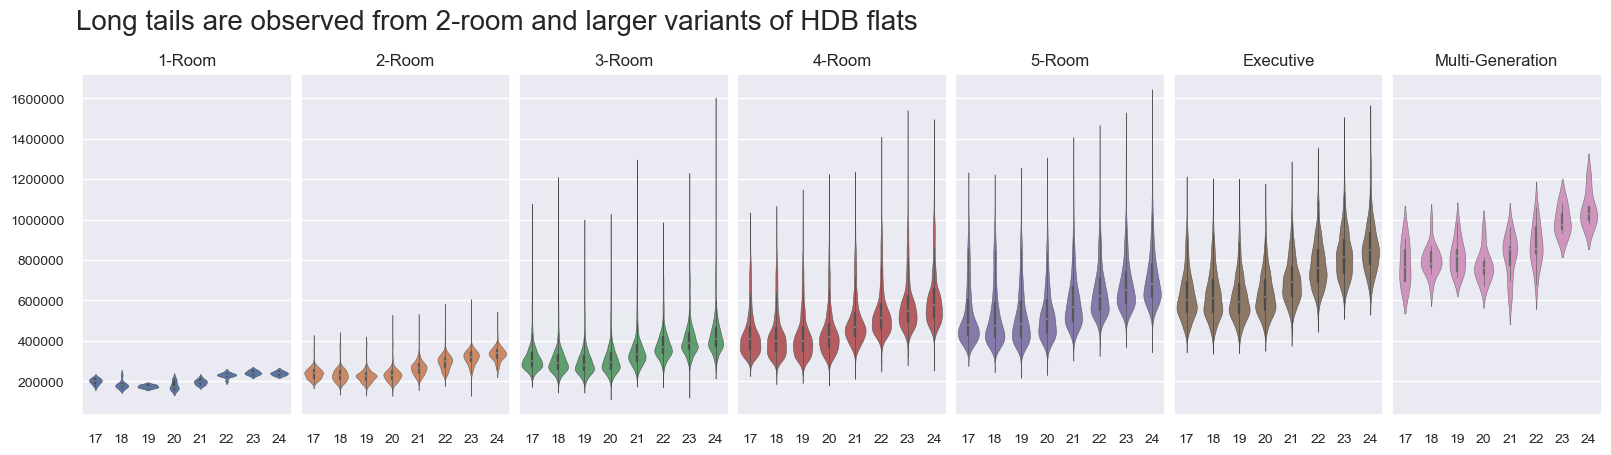

In [30]:
flat_types = np.sort(df['flat_type'].unique())

# fig, ax = plt.subplots(2, len(flat_types) // 2 + 1, figsize=(16, 10), constrained_layout=True)
fig, ax = plt.subplots(1, 7, figsize=(16, 4), constrained_layout=True, sharey=True)

for index, flat_type in enumerate(flat_types):
    # print(index, flat_type)
    sns.violinplot(
        data=df.query("flat_type == @flat_type"),
        x="year",
        y="resale_price",
        ax=ax.flatten()[index],
        color=sns.color_palette()[index % len(sns.color_palette())],
    )

    # To remove scientific representation of numbers; i.e. "1e6"
    ax.flatten()[index].ticklabel_format(style="plain", axis="y")

    # # Amending axis ticks and labels
    ax.flatten()[index].set_xticks(ax.flatten()[index].get_xticks())
    ax.flatten()[index].set_xticklabels([f"{i%2000}" for i in range(df['year'].min(), df['year'].max() + 1)])

    # Amending 
    ax.flatten()[index].set_title(flat_type.title().replace(" ", "-"))
    ax.flatten()[index].set_xlabel(None)
    ax.flatten()[index].set_ylabel(None)

# ax.flatten()[-1].grid(None)
# ax.flatten()[-1].axis('off')
fig.suptitle("Long tails are observed from 2-room and larger variants of HDB flats", ha='right', size=20, x=0.57, y=1.1);

The same 30-odd% increase in resale flat prices are observed regardless of flat types (perhaps not for 1-room flats, although the number of transacted 1-room flat is too small and infrequent to draw meaningful conclusions)

In [33]:
data = df.groupby(by=["flat_type", "year"])["resale_price"].agg("mean").reset_index()
data_pivot = data.pivot_table(index="flat_type", columns="year", values="resale_price")
# data_pivot

Text(0.0, 1.0, "Mean Prices of resale flats every year,\ngrouped by flat types ('10,000)")

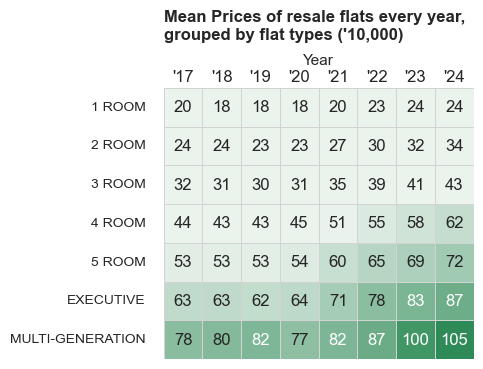

In [34]:
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)
labels = data_pivot.map(lambda x: f"{x/10000:,.0f}")

fig, ax = plt.subplots(figsize=(4, 11))
sns.heatmap(data_pivot, square=True, ax=ax, cmap=seagreen_palette, linewidths=0.5, linecolor="lightgrey", annot=labels, fmt='', cbar=None, vmin=500000)

ax.grid(None)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks(ax.get_xticks())

# Manipulating x labels
ax.set_xticklabels([f"'{i}" for i in range(17, 25)], fontsize=12, fontdict={'verticalalignment':'top'})
ax.set_xlabel("Year")
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax.xaxis.set_label_position('top')

ax.set_title("Mean Prices of resale flats every year,\ngrouped by flat types ('10,000)", loc='left', pad=10, weight='bold')

In [35]:
data = df.groupby(by=["town", "year"])['resale_price'].agg('mean').reset_index()
data_pivot = data.pivot_table(index="town", columns="year", values="resale_price")
data_pivot = data_pivot.sort_values(by=2024, ascending=False)

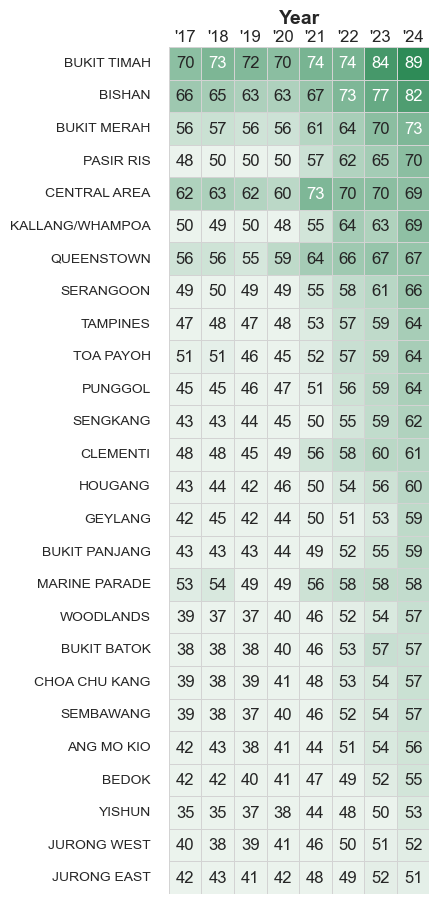

In [36]:
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)
labels = data_pivot.map(lambda x: f"{x/10000:,.0f}")

fig, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(data_pivot, square=True, ax=ax, cmap=seagreen_palette, linewidths=0.5, linecolor="lightgrey", annot=labels, fmt='', cbar=None, vmin=500000)

ax.grid(None)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks(ax.get_xticks())

# Manipulating x labels
ax.set_xticklabels([f"'{i}" for i in range(17, 25)], fontsize=12, fontdict={'verticalalignment':'top'})
ax.set_xlabel("Year", weight='bold', size=14)
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax.xaxis.set_label_position('top')

The same 30-odd% increase in resale flat prices are observed regardless of __towns__

In [39]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['x'], df['y']), crs=geo_df.crs,
)

# gdf
# geo_df

NameError: name 'geo_df' is not defined

In [40]:
gdf = gdf.query("year == 2023")

fig, ax = plt.subplots(figsize=(16, 10))

geo_df.plot(ax=ax, color='white', edgecolor='black')
scatter = ax.scatter(gdf['x'], gdf['y'], c=gdf['resale_price'], s=5, cmap='Greens')

# Add colorbar
fig.colorbar(scatter, orientation="vertical", label="Resale Price", shrink=0.83)

ax.axis('off')

NameError: name 'gdf' is not defined

In [41]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']), crs=geo_df.crs,)
gdf = gdf.query("year == 2023")
test = gdf.sjoin(geo_df, how='right')
mean_price = test.groupby("PLN_AREA_N")[['resale_price']].agg('mean').reset_index()
for_plot = geo_df.merge(mean_price, on='PLN_AREA_N')

NameError: name 'geo_df' is not defined

NameError: name 'for_plot' is not defined

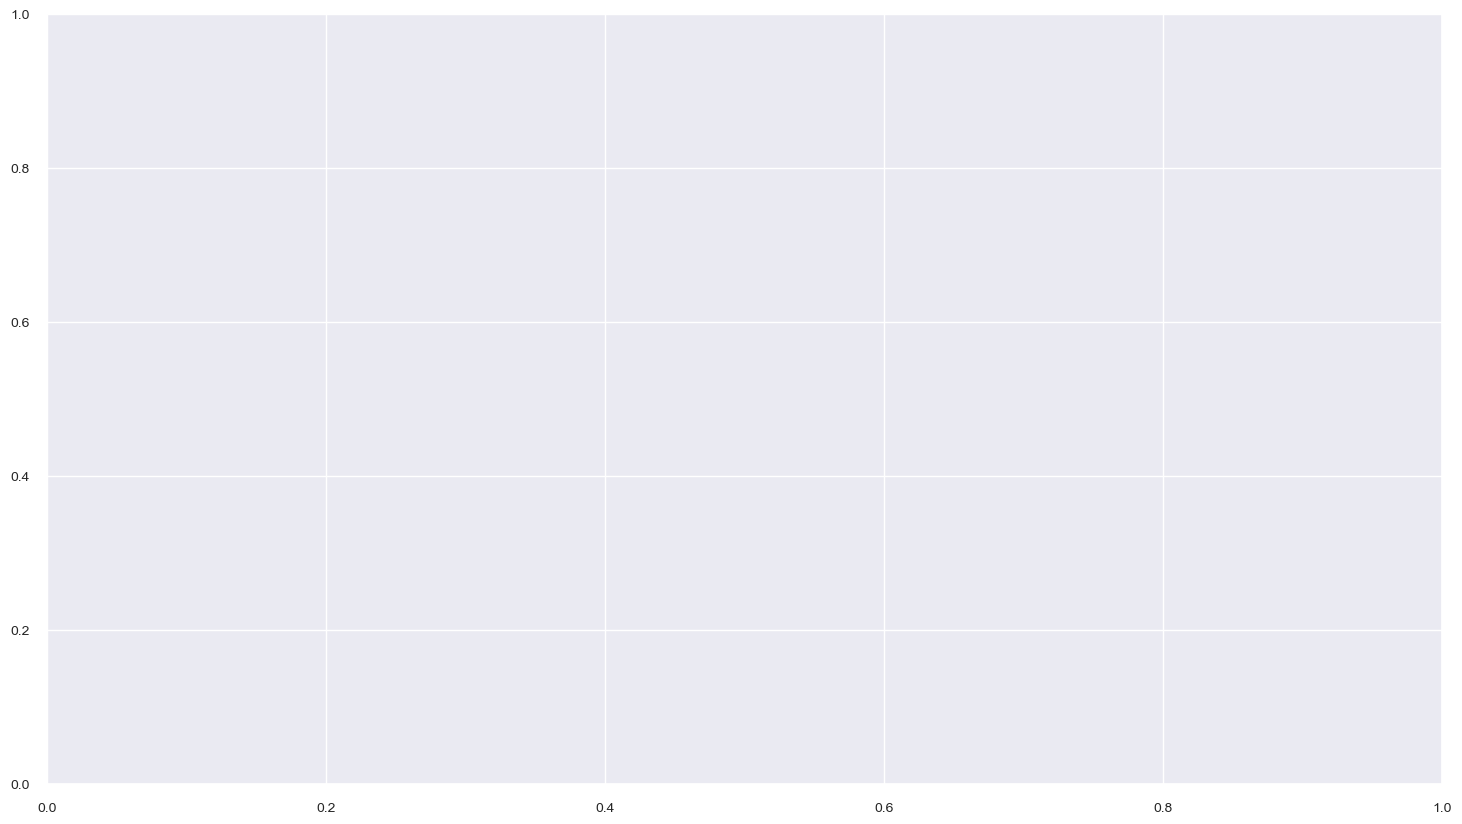

In [42]:
fig, ax = plt.subplots(figsize=(18, 10))
for_plot.plot(
    column="resale_price",
    cmap="Greens",
    edgecolor='black',
    ax=ax,
    legend = True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "missing values",
    },
)

# ax.scatter(gdf["x"], gdf["y"], c=gdf["resale_price"], s=5, cmap="Greens")
ax.scatter(gdf["x"], gdf["y"], s=1, c='grey')


for index, row in for_plot.iterrows():
    if not np.isnan(row.resale_price):
        ax.annotate(
        text=row["PLN_AREA_N"].title(),
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        # xytext=(0, 0),
        xycoords="data",
        # textcoords="offset points",
        ha="center",
        va="center",
        fontsize=10,
    )

ax.axis('off');
ax.set_title("Grey dots show points within towns where flats were sold.", loc='left', size=16);

In [ ]:
""" This is used to append the postal code, xy, and lat/long information to the resale price df
for i in range(160000, 176233):
    print(i)
    search_value = df.loc[i, "block"] + " " + df.loc[i, "street_name"]
    response = requests.get(
        f"https://www.onemap.gov.sg/api/common/elastic/search?searchVal={search_value}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    )
    while response.status_code != 200:
        time.sleep(1)
        print("not 200")
        response = requests.get(
            f"https://www.onemap.gov.sg/api/common/elastic/search?searchVal={search_value}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
        )
    json_data = response.json()
    if len(json_data['results']) > 0:
        df.loc[i, 'search_val'] = json_data['results'][0]['SEARCHVAL']
        df.loc[i, "address"] = json_data["results"][0]["ADDRESS"]
        df.loc[i, "postal"] = json_data["results"][0]["POSTAL"]
        df.loc[i, "x"] = json_data["results"][0]["X"]
        df.loc[i, "y"] = json_data["results"][0]["Y"]
        df.loc[i, "latitude"] = json_data["results"][0]["LATITUDE"]
        df.loc[i, "longitude"] = json_data["results"][0]["LONGITUDE"]

df.to_csv("testing.csv")
"""

In [43]:
data = df.groupby(by=[pd.Grouper(key="month", freq="Y"), "town"]).size().reset_index()
data = data.rename(columns={"month": "year", 0: "count"})
data["year"] = data["year"].dt.year
data_pivot = data.pivot_table(index="town", columns="year", values="count")
data_pivot = data_pivot.iloc[:, :-1]
data_pivot = data_pivot.sort_values(by=2023, ascending=False)
# data_pivot

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/725426124.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = df.groupby(by=[pd.Grouper(key="month", freq="Y"), "town"]).size().reset_index()


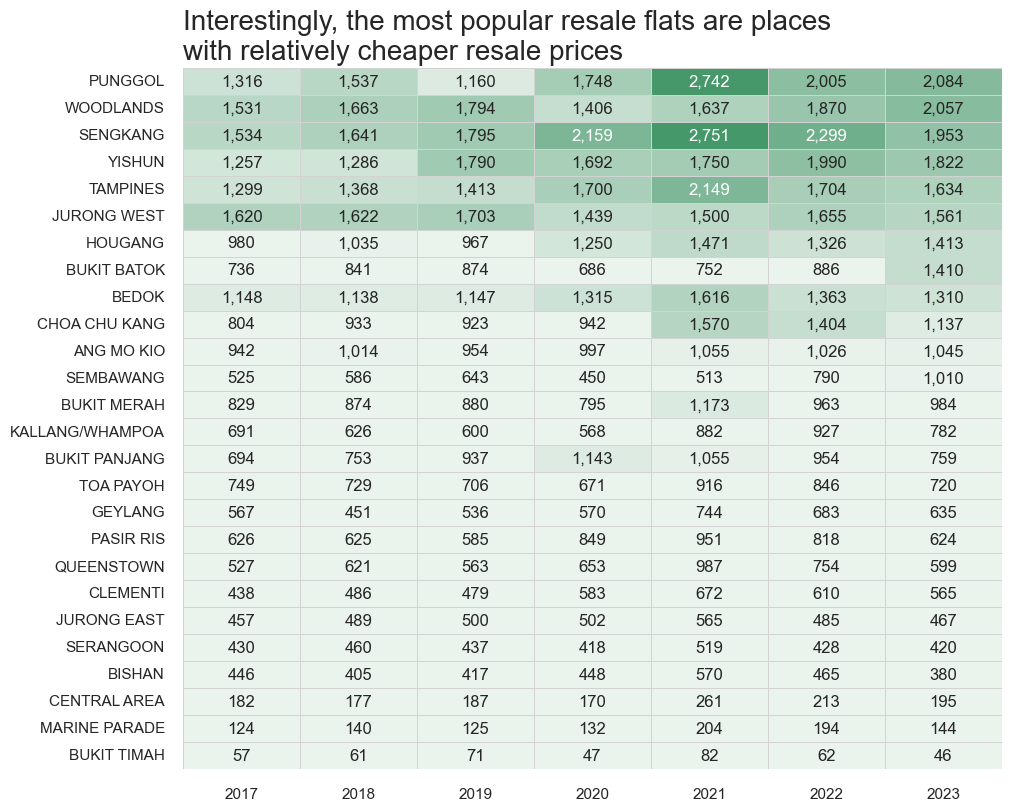

In [44]:
labels = data_pivot.map(lambda x: f"{x:,.0f}" if not np.isnan(x) else "0")
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=1000,
    vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(
    "Interestingly, the most popular resale flats are places\nwith relatively cheaper resale prices",
    size=20,
    loc="left",
)
ax.set_yticklabels(ax.get_yticklabels(), size=11);
ax.set_xticklabels(ax.get_xticklabels(), size=11);

## Summary from Section 2:
- We have observed a CAGR of 3.64% and absolute percentage increase in resale flat prices of 33.06% between 2017 to 2024.

Our analysis show that this is the 17th consecutive price increase since the first quarter of 2020, and that the increase is 2.17% in 2024Q1 and 0.28% in 2023Q4. The discrepancy for the numbers in 2023Q4 is concerning. The dicrepany for the other 2 figures are reasonable.

3 room 32 - 42
4 room 44 - 60
5 room 53 - 70

Most expensive towns are Bukit Timah, Bishan, and Bukit Merah


The Compound Annual Growth Rate (CAGR) is 3.64%, and the percentage increase of property prices from 2017 to 2024 is 33.06%

# __3. Million-Dollar Price Tags for Public Housing?!__


In [45]:
data = df.query("resale_price > 1_000_000")
data = data.groupby('year').size().to_frame().rename(columns={0:'count'})
data = data.iloc[:-1:, ]
data['pct_chg'] = data.pct_change() * 100
# data

resale_transactions = df.groupby('year').size().to_frame().rename(columns={0:'resale'})
resale_mil = df.query("resale_price > 1_000_000").groupby('year').size().to_frame().rename(columns={0:'num_million'})
data_million = resale_transactions.merge(resale_mil, left_index=True, right_index=True)
data_million = data_million.iloc[:-1:, ]
data_million['pct_mill'] = data_million['num_million'] * 100 / data_million['resale']
# data_million

Text(0.0, 1.0, 'The proportion of million-dollar transacted flats is\ngrowing rapidly')

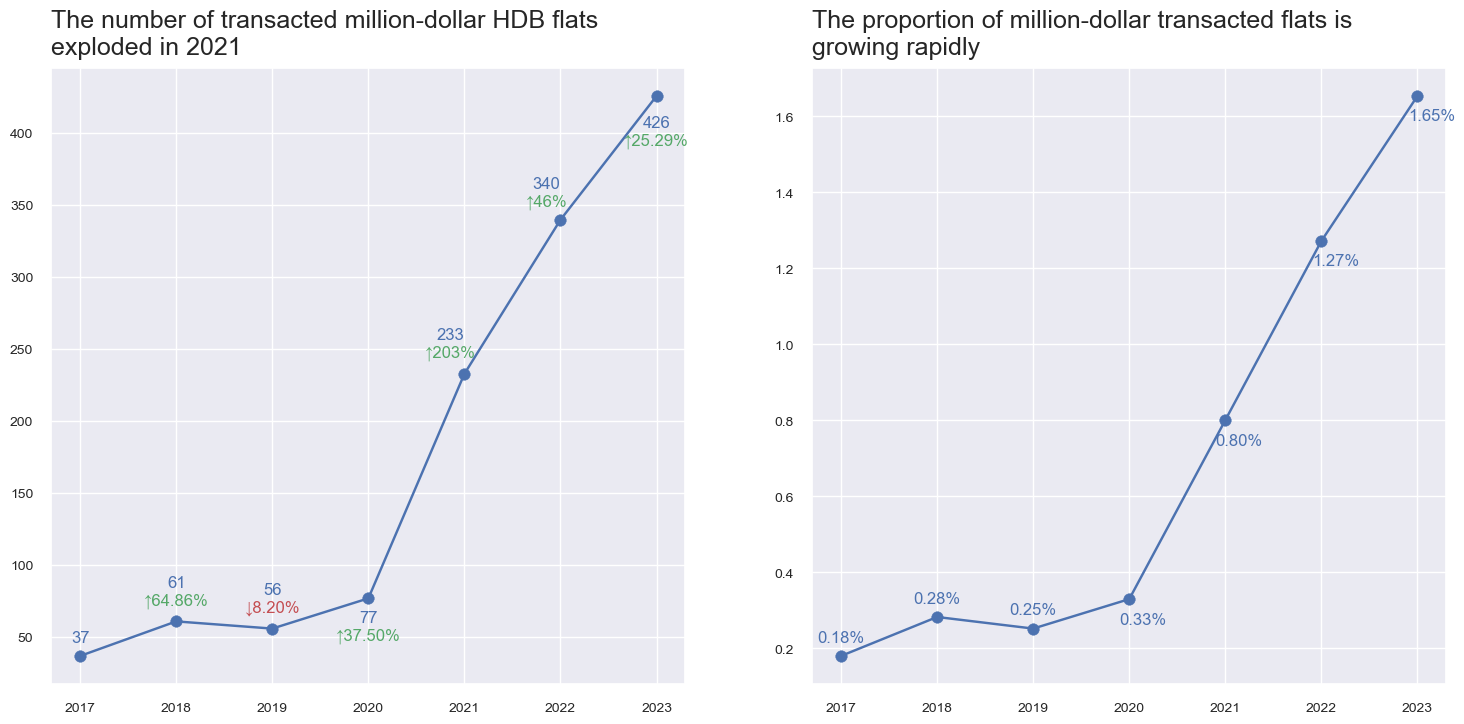

In [47]:
x_axis = data.index
y_axis = data["count"]
y2_axis = data['pct_chg']

color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax.flatten()[0].plot(x_axis, y_axis)
ax.flatten()[0].scatter(x_axis, y_axis, s=70)

x_list, y_list = ax.flatten()[0].lines[0].get_data()

for x, y, pct_chg in zip(x_list, y_list, y2_axis):
    if x == 2017:
        ax.flatten()[0].annotate(f"{y:,.0f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
    elif x == 2018:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif x == 2019:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↓{-pct_chg:.2f}%", xy=(x, y), xytext=(0, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[3])
    elif x == 2020:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(0, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(0, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif x == 2021:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(-10, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↑{pct_chg:.0f}%", xy=(x, y), xytext=(-10, 12), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif x == 2022:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(-10, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↑{pct_chg:.0f}%", xy=(x, y), xytext=(-10, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    else:
        ax.flatten()[0].annotate(f"{y:,.0f}\n", xy=(x, y), xytext=(0, -35), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
        ax.flatten()[0].annotate(f"\n↑{pct_chg:.2f}%", xy=(x, y), xytext=(0, -35), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])


title_str = "The number of transacted million-dollar HDB flats\nexploded in 2021"
ax.flatten()[0].set_title(title_str, loc="left", pad=10, size=18)

x2_axis = data_million.index
y3_axis = data_million["pct_mill"]

ax.flatten()[1].plot(x2_axis, y3_axis)
ax.flatten()[1].scatter(x2_axis, y3_axis, s=70)

x2_list, y2_list = ax.flatten()[1].lines[0].get_data()

for x, y, pct_chg in zip(x2_list, y2_list, y3_axis):
    if x in [2020, 2021, 2022, 2023]:
        ax.flatten()[1].annotate(f"{y:,.2f}%", xy=(x, y), xytext=(10, -18), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
    else:
        ax.flatten()[1].annotate(f"{y:,.2f}%", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])

title_str = "The proportion of million-dollar transacted flats is\ngrowing rapidly"
ax.flatten()[1].set_title(title_str, loc="left", pad=10, size=18)


# ax.axis('off')
# ax.grid(None)
# ax.set_facecolor('white')

In 2023, 426 transacted flats are priced above the million dollars. This represents an increase of 25% from 2022. in 2023, the proportion of transacted flats above 1 million dollars has increase to 1.65%. The rate of increase of the proportion of million-dollar transacted flat should be of concern to the incumbent government. 

In [48]:
data = df.query("resale_price > 1_000_000")
data = data.groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'count'})
data = data.iloc[:-1:, ]
data['pct_chg'] = data.pct_change() * 100
# data

resale_transactions = df.groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'resale'})
resale_mil = df.query("resale_price > 1_000_000").groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'num_million'})
data_million = resale_transactions.merge(resale_mil, left_index=True, right_index=True)
data_million = data_million.iloc[:-1:,]
data_million['pct_mill'] = data_million['num_million'] * 100 / data_million['resale']
# data_million

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/3025978515.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data = data.groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'count'})
/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/3025978515.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resale_transactions = df.groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'resale'})
/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_79093/3025978515.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resale_mil = df.query("resale_price > 1_000_000").groupby(pd.Grouper(key="month", freq="Q")).size().to_frame().rename(columns={0:'num_million'})


Text(0.0, 1.0, 'The proportion of million-dollar transacted flats is\ngrowing per quarter')

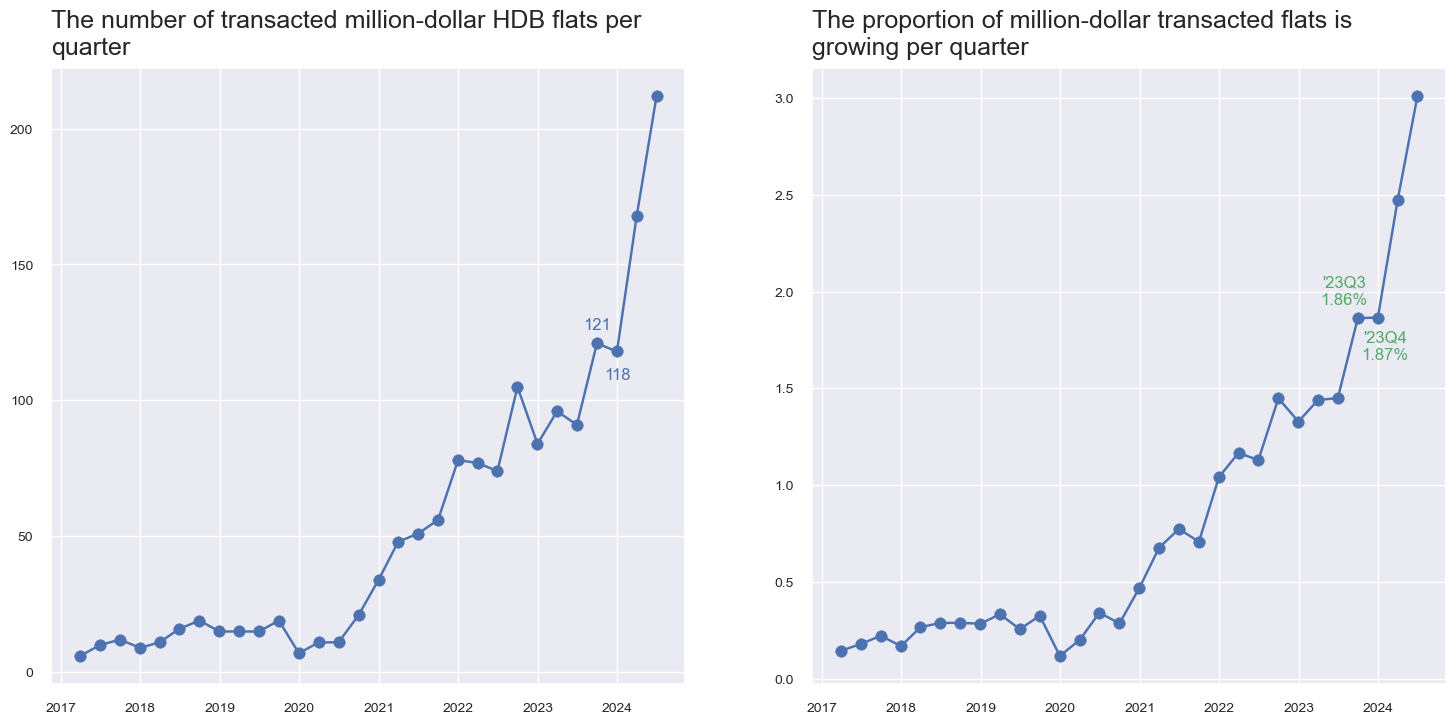

In [49]:
x_axis = data.index
y_axis = data["count"]
y2_axis = data['pct_chg']

color_wheel = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax.flatten()[0].plot(x_axis, y_axis)
ax.flatten()[0].scatter(x_axis, y_axis, s=70)

x_list, y_list = ax.flatten()[0].lines[0].get_data()

for x, y, pct_chg in zip(x_list, y_list, y2_axis):
    if y in [121, 170]:
        ax.flatten()[0].annotate(f"{y:,.0f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])
    elif y == 118:
        ax.flatten()[0].annotate(f"{y:,.0f}", xy=(x, y), xytext=(0, -20), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[0])


title_str = "The number of transacted million-dollar HDB flats per\nquarter"
ax.flatten()[0].set_title(title_str, loc="left", pad=10, size=18)

x2_axis = data_million.index
y3_axis = data_million["pct_mill"]

ax.flatten()[1].plot(x2_axis, y3_axis)
ax.flatten()[1].scatter(x2_axis, y3_axis, s=70)

x2_list, y2_list = ax.flatten()[1].lines[0].get_data()

for x, y, pct_chg in zip(x2_list, y2_list, y3_axis):
    if round(y, 2) == 1.86:
        ax.flatten()[1].annotate(f"'23Q3\n{y:,.2f}%", xy=(x, y), xytext=(-10, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif round(y, 2) == 1.87:
        ax.flatten()[1].annotate(f"'23Q4\n{y:,.2f}%", xy=(x, y), xytext=(5, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif round(y, 2) == 2.49:
        ax.flatten()[1].annotate(f"'24Q1\n{y:,.2f}%", xy=(x, y), xytext=(0, 10), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[2])
    elif round(y, 2) == 1.54:
        ax.flatten()[1].annotate(f"'24Q2\n{y:,.2f}%", xy=(x, y), xytext=(0, -30), textcoords='offset points', xycoords='data', ha='center', color=color_wheel[3])

title_str = "The proportion of million-dollar transacted flats is\ngrowing per quarter"
ax.flatten()[1].set_title(title_str, loc="left", pad=10, size=18)

# ax.axis('off')
# ax.grid(None)
# ax.set_facecolor('white')

Quoted from this [article][news]:
- PropNex Realty’s head of research and content Wong Siew Ying said a total of 185 flats changed hands for at least $1 million in the first quarter of 2024. “This is the highest number of million-dollar resale flats transacted on a quarterly basis, led by the record-breaking 74 deals in January,” she said.
- However, these flats remain the minority, making up about 2.7 per cent of total transactions in the first quarter, Ms Wong added.

Based on our analysis, the number of transacted flat in the first quarter is 170 (c.f. 185), making up 2.5% of transactions (c.f. 2.7%). The reported figures are fairly consistent with our findings. Another intepretation of this (2.5%) figure is that million-dollar homes now is the 97.5th percentile of all resale flat transactions. While I agree with the head of research's interpretation that 2.5% still represents the minority of resale flat transactions, the rate of increase should be of concern.

[news]: https://www.straitstimes.com/singapore/housing/hdb-resale-prices-up-17-in-q1-higher-than-11-rise-in-previous-quarter

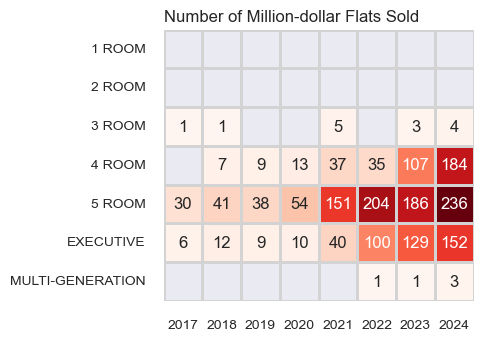

In [50]:
data = df.query('resale_price > 1_000_000')
data_pivot = data.pivot_table(index='flat_type', columns='year', values='town', aggfunc='count')
data_pivot = data_pivot.merge(pd.DataFrame(df["flat_type"].unique()), how='right', left_on='flat_type', right_on=0)
data_pivot = data_pivot.drop(0, axis=1)
data_pivot = data_pivot.set_index("flat_type")
data_pivot = data_pivot.sort_index()
# data_pivot = data_pivot.fillna(0)

labels = data_pivot.map(lambda x: f"{x:.0f}" if not np.isnan(x) else "0")
red_palette = sns.color_palette("Reds", as_cmap=True)

fig, ax = plt.subplots(figsize=(4,6))
sns.heatmap(data_pivot, ax=ax, square=True, cmap=red_palette, fmt='', annot=labels, linewidth=1, linecolor='lightgrey', cbar=False)

ax.grid(None)
ax.set_title("Number of Million-dollar Flats Sold", loc="left")
ax.set_ylabel(None);
ax.set_xlabel(None);

There is a 3-time increase in the number of million-dollar 4-room HDB flats.

In [51]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']), crs=geo_df.crs,)

polygon_df = gdf.sjoin(geo_df, how="right")
polygon_df = polygon_df.query("resale_price > 1_000_000")

data = (polygon_df.groupby(["PLN_AREA_N", 'year'])[["resale_price"]].size().reset_index())
data_pivot = data.pivot_table(index='PLN_AREA_N', columns='year', values=0, aggfunc='sum')
data_pivot = data_pivot.sort_values(by=2023, ascending=False)

labels = data_pivot.map(lambda x: f"{x:.0f}" if not np.isnan(x) else "0")
red_palette = sns.color_palette("Reds", as_cmap=True)
seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(6,10))
sns.heatmap(data_pivot, ax=ax, square=True, cmap=seagreen_palette, fmt='', annot=labels, linewidth=1, linecolor='lightgrey', cbar=False)

ax.grid(None)

# Manipulating x labels
ax.set_xticklabels([f"'{i}" for i in range(17, 25)], fontsize=12, fontdict={'verticalalignment':'top'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax.xaxis.set_label_position('top')

title_str = "Million dollar home transactions by\ntown"
ax.set_title(title_str, loc='left');

NameError: name 'geo_df' is not defined

In [52]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']), crs=geo_df.crs,)
gdf = gdf.query("year >= 2023 & resale_price > 1_000_000")

polygon_df = gdf.sjoin(geo_df, how="right")
mean_price = (
    polygon_df.groupby("PLN_AREA_N")[["resale_price"]].agg("mean").reset_index()
)
for_plot = geo_df.merge(mean_price, on="PLN_AREA_N")

NameError: name 'geo_df' is not defined

NameError: name 'for_plot' is not defined

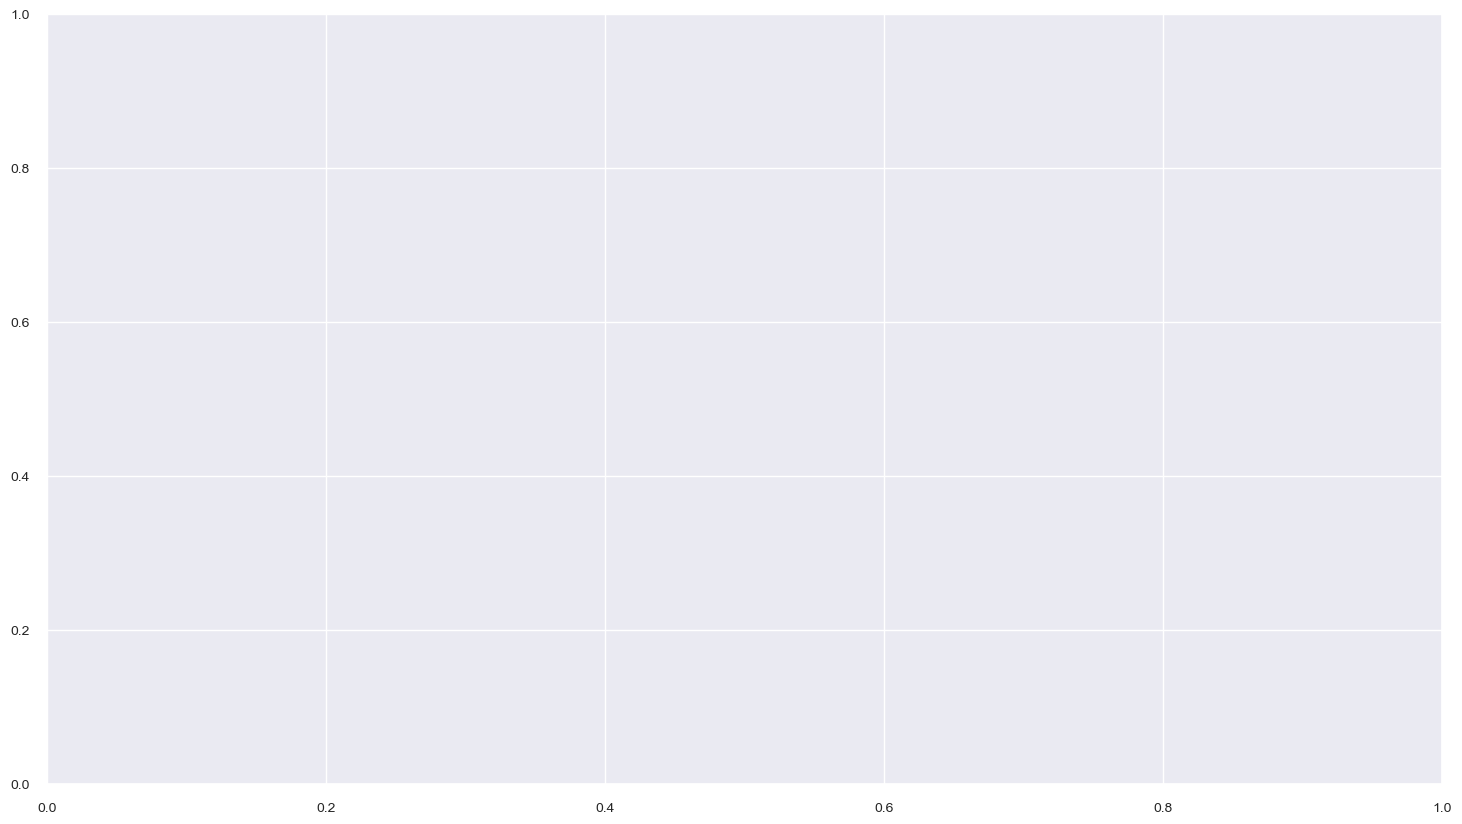

In [53]:
fig, ax = plt.subplots(figsize=(18, 10))

for_plot.plot(
    column="resale_price",
    cmap="Greens",
    edgecolor='black',
    ax=ax,
    legend = True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "missing values",
    },
)

for index, row in for_plot.iterrows():
    if not np.isnan(row.resale_price):
        ax.annotate(
        text=row["PLN_AREA_N"].title(),
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        # xytext=(0, 0),
        xycoords="data",
        # textcoords="offset points",
        ha="center",
        va="center",
        fontsize=10,
    )

flat_types = np.sort(gdf['flat_type'].unique())

for index, flat_type in enumerate(flat_types):
    temp = gdf.query("flat_type == @flat_type")
    ax.scatter(temp['x'], temp['y'], s=10, color=color_wheel[index])
    

ax.legend(flat_types, loc='best')
ax.axis('off')

Executive million dollar flats tend to be northbound. 5-room million dollar flats tend to be southbound. Outram has the most expensive million-dollar homes. Executive flats tend to be larger compared to 5-room flats.

A synthesis of these facts show that there is a premium placed for Southbound towns like Outram, Bukit Merah, Queenstown, and Bukit Timah. Hence even though 5-room flats are smaller, they are sold at a million-dollar premium. There is less of a premium placed for Northbound towns, which is why there are lesser 5-room flats sold above 1 million follars.

In [54]:
data = df.query("resale_price > 1_000_000")
data = data.groupby('lease_cat').size()
data

KeyError: 'lease_cat'

When we grouped the number of million-dollar flats by remaining lease, we observe that the bulk of million dollar flat transactions have remaining lease of 80 years and above. 

# __4. Tackling the issue of Affordability__

In this section, we will sequentially list down all calculations done and all assumptions made in answering the question of affordability. 

In [55]:
def get_x_percentile_flat_price(percentile:str):
    data = df.groupby(["year", "flat_type"])[["resale_price"]].agg(
        [
            lambda x: np.percentile(x, q=0),
            lambda x: np.percentile(x, q=10),
            lambda x: np.percentile(x, q=20),
            lambda x: np.percentile(x, q=30),
            lambda x: np.percentile(x, q=40),
            lambda x: np.percentile(x, q=50),
            lambda x: np.percentile(x, q=60),
            lambda x: np.percentile(x, q=70),
            lambda x: np.percentile(x, q=80),
            lambda x: np.percentile(x, q=90),
            lambda x: np.percentile(x, q=100),
        ]
    )

    data = data.droplevel(0, axis=1).reset_index()
    data = data.rename(
        columns={
            "<lambda_0>": "min",
            "<lambda_1>": "perc_10",
            "<lambda_2>": "perc_20",
            "<lambda_3>": "perc_30",
            "<lambda_4>": "perc_40",
            "<lambda_5>": "perc_50",
            "<lambda_6>": "perc_60",
            "<lambda_7>": "perc_70",
            "<lambda_8>": "perc_80",
            "<lambda_9>": "perc_90",
            "<lambda_10>": "perc_100",
        }
    )

    deciles = data.loc[:, ["year", "flat_type", percentile]]
    result = deciles.pivot_table(index="flat_type", columns="year", values=percentile)

    return result

flat_median = get_x_percentile_flat_price('perc_50')
# flat_median

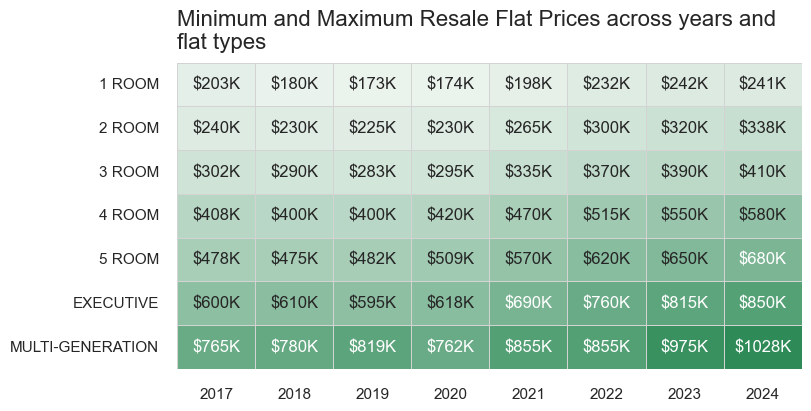

In [56]:
labels = flat_median.map(lambda x: f"${x/1000:.0f}K")
# labels

seagreen_palette = sns.light_palette("seagreen", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
sns.heatmap(
    flat_median,
    # square=True,
    ax=ax,
    cmap=seagreen_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    # vmin=1000,
    # vmax=3000,
    annot=labels,
    fmt="",
    cbar=None,
    annot_kws={"ha": "center"},
)
ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks(ax.get_xticks())
ax.set_yticklabels(ax.get_yticklabels(), size=11)
ax.set_xticklabels(range(2017, 2025), size=11)
ax.xaxis.set_label_position("top")

ax.set_title(
    "Minimum and Maximum Resale Flat Prices across years and\nflat types",
    size=16,
    loc="left",
    pad=10,
);

We start this discussion by determining the median price of HDB flats categorised by the flat-type. We will only consider the median price for each flat type in for 2024 (right-most column).

## Deriving Household Disposable Income

A. [Household income deciles][household-income-deciles2] for 2023 was retrieved from the Department of Statistics, Singapore.

[household-income-deciles]: https://tablebuilder.singstat.gov.sg/table/CT/17906
[household-income-deciles2]: https://tablebuilder.singstat.gov.sg/table/CT/17886#!


In [57]:
deciles = range(1, 10)
household_income_2023 = [2779, 4690, 6708, 8765, 10869, 13399, 16438, 20727, 28131]

income_df = pd.DataFrame(
    {
        'deciles': deciles,
        'household_income': household_income_2023
    }
)
income_df["disposable_income"] = income_df["household_income"] * 0.8
income_df["cpf-oa"] = income_df["household_income"] * 0.23
income_df

,deciles,household_income,disposable_income,cpf-oa
0,1,2779,2223.2,639.17
1,2,4690,3752.0,1078.70
2,3,6708,5366.4,1542.84
3,4,8765,7012.0,2015.95
4,5,10869,8695.2,2499.87
5,6,13399,10719.2,3081.77
6,7,16438,13150.4,3780.74
7,8,20727,16581.6,4767.21
8,9,28131,22504.8,6470.13


B. ```disposable_income``` - Singapore mandates a <b>20% contribution</b> of the employee's salary to the Central Provident Fund (CPF), so a factor of 0.8 was multipled to household income to arrive at the <b>household disposable income</b>.

C. ```cpf-oa``` - A factor of [0.23][seedly-cpf-allocation] will also be applied to the household income to arrive at the Central Provident Fund - Ordinary Account (CPF-OA) contribution. The OA is the portion of the CPF OA that can be used to service the housing loan. We assume that the home buyers rely primarily on their OA to service their housing loan. Any outstanding loan which cannot be covered by the OA contribution will then be paid using their <b>disposable income</b>.

[cpf-oa-sa-ma-allocation]: https://www.cpf.gov.sg/content/dam/web/employer/employer-obligations/documents/CPFAllocationRatesfrom_1_January_2024.pdf
[seedly-cpf-allocation]: https://blog.seedly.sg/cpf-contribution-rates-singapore-guide/

## Flat Type

In [58]:
income_df['flat_type'] = '4 ROOM'
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type
0,1,2779,2223.2,639.17,4 ROOM
1,2,4690,3752.0,1078.70,4 ROOM
2,3,6708,5366.4,1542.84,4 ROOM
3,4,8765,7012.0,2015.95,4 ROOM
4,5,10869,8695.2,2499.87,4 ROOM
5,6,13399,10719.2,3081.77,4 ROOM
6,7,16438,13150.4,3780.74,4 ROOM
7,8,20727,16581.6,4767.21,4 ROOM
8,9,28131,22504.8,6470.13,4 ROOM


In [59]:
def pct_x_price_of_flat(df, flat_type, income):
    if flat_type in ["2 ROOM", "3 ROOM"]:
        return df.loc[flat_type, 2024]
    elif flat_type in ["4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]:
        return df.loc[flat_type, 2024]

In [60]:
income_df['flat_price_median'] = income_df['household_income'].apply(lambda x: pct_x_price_of_flat(flat_median, '4 ROOM', x))
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median
0,1,2779,2223.2,639.17,4 ROOM,580000.0
1,2,4690,3752.0,1078.70,4 ROOM,580000.0
2,3,6708,5366.4,1542.84,4 ROOM,580000.0
3,4,8765,7012.0,2015.95,4 ROOM,580000.0
4,5,10869,8695.2,2499.87,4 ROOM,580000.0
5,6,13399,10719.2,3081.77,4 ROOM,580000.0
6,7,16438,13150.4,3780.74,4 ROOM,580000.0
7,8,20727,16581.6,4767.21,4 ROOM,580000.0
8,9,28131,22504.8,6470.13,4 ROOM,580000.0


D. ```flat_type``` - The resale flat type. Possible values are ```2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, MULTI-GENERATION```

E. ```flat_price_median``` - The median price of a 4-room HDB flat based on the ```flat_median``` dataframe

This segment focuses on affordability of median-priced 4-room resale HDB across household income deciles.


## Housing Grants

The government provides a slew of [grants][grants] to aid Singaporeans in purchasing and owning a HDB flat. In this exercise, two key assumptions will be made; 
1. The profile of the home buyers is an about-to-be-married couple (or in HDB terms - a first-time family). This allows them to qualify for the highest quantum of subsidies (i.e. the first-time families suite of grants). 
2. The couple is also assumed to qualify for SGD 20,000 of the proximity grant. <br>

More details relating to grants can be found [here][grants].

[grants]: https://www.mof.gov.sg/docs/librariesprovider3/budget2023/download/pdf/annexe1.pdf

In [61]:
# the amount of housing grant awarded for first-time buyers is determined by the type of flat purchase as well as their household income

def housing_grant(flat_type, income):
    """
    Calculates the amount of grant that a first time family gets, which is dependent on thir household income and flat type
    """
    # only proximity housing grant is awarded if household income exceeds 14_000
    if income > 14000:
        return 20_000  

    # we assume that first-time families will only be granted 20_000 
    # since the whole point of getting a resale flat is to move out of your parent's
    proximity_housing_grant = 20000

    # cpf housing grant - dependent on the flat type    
    if flat_type in ["2 ROOM", "3 ROOM", "4 ROOM"]:
        cpf_housing_grant = 80000
    else:
        cpf_housing_grant = 50000

    # enhanced cpf grant is dependent on income
    enhanced_cpf_housing_grant = max(
        80000 - 5000 * (math.ceil(max(1500, income) / 500) - 3), 0
    )

    # total grant is the summation of proximity grant, cpf grant, and enhanced cpf grant
    return proximity_housing_grant + cpf_housing_grant + enhanced_cpf_housing_grant

In [62]:
income_df["grants"] = income_df["household_income"].apply(lambda x: housing_grant('4 ROOM', x))
income_df['flat_price_after_grant'] = income_df['flat_price_median'] - income_df['grants']
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median,grants,flat_price_after_grant
0,1,2779,2223.2,639.17,4 ROOM,580000.0,165000,415000.0
1,2,4690,3752.0,1078.70,4 ROOM,580000.0,145000,435000.0
2,3,6708,5366.4,1542.84,4 ROOM,580000.0,125000,455000.0
3,4,8765,7012.0,2015.95,4 ROOM,580000.0,105000,475000.0
4,5,10869,8695.2,2499.87,4 ROOM,580000.0,100000,480000.0
5,6,13399,10719.2,3081.77,4 ROOM,580000.0,100000,480000.0
6,7,16438,13150.4,3780.74,4 ROOM,580000.0,20000,560000.0
7,8,20727,16581.6,4767.21,4 ROOM,580000.0,20000,560000.0
8,9,28131,22504.8,6470.13,4 ROOM,580000.0,20000,560000.0


F. ```grants``` - The amount of grants awarded to the first-time home buyers given the flat type and their household income

G. ```flat_price_after_grant``` - The final price of the flat for first-time home buyers


## Downpayment of 20%, Loan of 80%

Home buyers need to put a [20% downpayment][downpayment] when they purchase a flat. We assume that the couple has the financial means to afford the 20% downpayment and requires no additional loans for the downpayment. The remaining 80% of the price of the flat will be financed with an amortised (HDB) loan.

[downpayment]: https://blog.moneysmart.sg/home-loans/hdb-downpayment-guide/

In [63]:
def monthly_amortised_payments(total_loan, interest, n_years):
    """
    Calculates the monthly payments given the loan quamtum, interest, and number of years
    """
    interest = (interest / 100) / 12
    n_payments = n_years * 12
    result = total_loan * (
        (interest * (1 + interest) ** n_payments) / ((1 + interest) ** n_payments - 1)
    )
    return result

In [64]:
income_df["loan"] = income_df["flat_price_after_grant"] * 0.8
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median,grants,flat_price_after_grant,loan
0,1,2779,2223.2,639.17,4 ROOM,580000.0,165000,415000.0,332000.0
1,2,4690,3752.0,1078.70,4 ROOM,580000.0,145000,435000.0,348000.0
2,3,6708,5366.4,1542.84,4 ROOM,580000.0,125000,455000.0,364000.0
3,4,8765,7012.0,2015.95,4 ROOM,580000.0,105000,475000.0,380000.0
4,5,10869,8695.2,2499.87,4 ROOM,580000.0,100000,480000.0,384000.0
5,6,13399,10719.2,3081.77,4 ROOM,580000.0,100000,480000.0,384000.0
6,7,16438,13150.4,3780.74,4 ROOM,580000.0,20000,560000.0,448000.0
7,8,20727,16581.6,4767.21,4 ROOM,580000.0,20000,560000.0,448000.0
8,9,28131,22504.8,6470.13,4 ROOM,580000.0,20000,560000.0,448000.0


H. ```loan``` - The amount of loan that needs to be taken following the 20% downpayment. We assume that the couple has the financial means to make the 20% downpayment without a loan

## Interest Rate and Term of repayment.

We assume that this hypothetical couple will be taking a HDB loan. The interest rate for a HDB housing loan is be [2.6% per annum][housing-loan-interest] and the payment term is assumed to be 25 years.

[housing-loan-interest]: https://www.hdb.gov.sg/about-us/news-and-publications/press-releases/CPF-Interest-Rates-From-1-January-2024-To-31-March-2024-And-Basic-Healthcare-Sum-For-2024#:~:text=The%20OA%20interest%20rate%20will,2024%20to%2031%20March%202024.

In [65]:
income_df['monthly_mortgage'] = income_df['loan'].apply(lambda x: monthly_amortised_payments(x, 2.6, 25))
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median,grants,flat_price_after_grant,loan,monthly_mortgage
0,1,2779,2223.2,639.17,4 ROOM,580000.0,165000,415000.0,332000.0,1506.182764
1,2,4690,3752.0,1078.70,4 ROOM,580000.0,145000,435000.0,348000.0,1578.769885
2,3,6708,5366.4,1542.84,4 ROOM,580000.0,125000,455000.0,364000.0,1651.357006
3,4,8765,7012.0,2015.95,4 ROOM,580000.0,105000,475000.0,380000.0,1723.944127
4,5,10869,8695.2,2499.87,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908
5,6,13399,10719.2,3081.77,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908
6,7,16438,13150.4,3780.74,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392
7,8,20727,16581.6,4767.21,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392
8,9,28131,22504.8,6470.13,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392


I. ```monthly-mortgage``` - The monthly loan payment assuming an annual interest rate of 2.6% p.a. and a loan term of 25 years

## Using CPF-OA to pay for the monthly-mortgage, and the remaining with disposable income

In [66]:
income_df['out_of_pocket'] = (income_df['monthly_mortgage'] - income_df['cpf-oa']).apply(lambda x: x if x > 0 else 0)
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median,grants,flat_price_after_grant,loan,monthly_mortgage,out_of_pocket
0,1,2779,2223.2,639.17,4 ROOM,580000.0,165000,415000.0,332000.0,1506.182764,867.012764
1,2,4690,3752.0,1078.70,4 ROOM,580000.0,145000,435000.0,348000.0,1578.769885,500.069885
2,3,6708,5366.4,1542.84,4 ROOM,580000.0,125000,455000.0,364000.0,1651.357006,108.517006
3,4,8765,7012.0,2015.95,4 ROOM,580000.0,105000,475000.0,380000.0,1723.944127,0.000000
4,5,10869,8695.2,2499.87,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908,0.000000
5,6,13399,10719.2,3081.77,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908,0.000000
6,7,16438,13150.4,3780.74,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000
7,8,20727,16581.6,4767.21,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000
8,9,28131,22504.8,6470.13,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000


J. ```out_of_pocket``` The amount of loan paid with disposable income. If the monthly CPF-OA contribution is sufficient to pay for the monthly loan, then 0.000 will be shown, otherwise a float is returned. A value higher than 0 is more likely to occur amongst the lower-decile household income earners.

## Affordabiliy Indicator

With reference to this [article][overburden], people spending more than 40% of disposable income on housing are considered overburdened by housing costs. We suspect that HDB takes reference to this housing overburden indicator since monthly installments are [capped at 30%][servicing-hdb-loan] of the applicants monthly income - a more conservative ratio. For this exercise, we will reference the CPF 30% overburden crtieria. If the monthly mortgage exceeds 30%, this implies that home buyers are overburdened by housing costs.

[overburden]: https://www.oecd.org/els/family/HC1-2-Housing-costs-over-income.pdf
[servicing-hdb-loan]: https://www.hdb.gov.sg/residential/buying-a-flat/understanding-your-eligibility-and-housing-loan-options/housing-loan-options/housing-loan-from-hdb
[oced-affordability-indicators]: https://www.oecd.org/els/family/HC1-5%20Overview%20of%20affordable%20housing%20indicators.pdf

In [67]:
income_df['price_income'] = income_df['out_of_pocket'] / income_df['disposable_income']
income_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,flat_price_median,grants,flat_price_after_grant,loan,monthly_mortgage,out_of_pocket,price_income
0,1,2779,2223.2,639.17,4 ROOM,580000.0,165000,415000.0,332000.0,1506.182764,867.012764,0.389984
1,2,4690,3752.0,1078.70,4 ROOM,580000.0,145000,435000.0,348000.0,1578.769885,500.069885,0.133281
2,3,6708,5366.4,1542.84,4 ROOM,580000.0,125000,455000.0,364000.0,1651.357006,108.517006,0.020222
3,4,8765,7012.0,2015.95,4 ROOM,580000.0,105000,475000.0,380000.0,1723.944127,0.000000,0.000000
4,5,10869,8695.2,2499.87,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908,0.000000,0.000000
5,6,13399,10719.2,3081.77,4 ROOM,580000.0,100000,480000.0,384000.0,1742.090908,0.000000,0.000000
6,7,16438,13150.4,3780.74,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000,0.000000
7,8,20727,16581.6,4767.21,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000,0.000000
8,9,28131,22504.8,6470.13,4 ROOM,580000.0,20000,560000.0,448000.0,2032.439392,0.000000,0.000000


```price-income``` - The out_of_pocket payment divided by disposable income. A ratio higher than 0.3 is the criteria for overburdened housing costs.

The monthly-mortgage to disposable income ratio actually shows that the price income ratio for a median-priced 4-room HDB flat is actually accessible to the second decile of household income earners. This is actually a good evidence to support the affordability of HDBs over a spectrum of household income earners.

## Income Ceiling 

There is [no income ceiling][income-ceiling] for if you wish to purchase a HDB Resale flat. However, no grants will be provided beyond a certain income.

[income-ceiling]: https://dollarbackmortgage.com/blog/income-ceiling-hdb-bto-ec/


## Heatmap of price-to-income ratios for household income deciles and flat_types and x_pct_prices

In [68]:
def housing_grant(flat_type, income):
    """
    Calculates the amount of grant that a first time family gets, which is dependent on thir household income and flat type
    """
    # only proximity housing grant is awarded if household income exceeds 14_000
    if income > 14000:
        return 20_000

    # we assume that first-time families will only be granted 20_000
    # since the whole point of getting a resale flat is to move out of your parent's
    proximity_housing_grant = 20000

    # cpf housing grant - dependent on the flat type
    if flat_type in ["2 ROOM", "3 ROOM", "4 ROOM"]:
        cpf_housing_grant = 80000
    else:
        cpf_housing_grant = 50000

    # enhanced cpf grant is dependent on income
    enhanced_cpf_housing_grant = max(
        80000 - 5000 * (math.ceil(max(1500, income) / 500) - 3), 0
    )

    # total grant is the summation of proximity grant, cpf grant, and enhanced cpf grant
    return proximity_housing_grant + cpf_housing_grant + enhanced_cpf_housing_grant


def monthly_amortised_payments(total_loan, interest, n_years):
    """
    Calculates the monthly payments given the loan quamtum, interest, and number of years
    """
    interest = (interest / 100) / 12
    n_payments = n_years * 12
    result = total_loan * (
        (interest * (1 + interest) ** n_payments) / ((1 + interest) ** n_payments - 1)
    )
    return result


def maximum_loan_afforded(loan_paid, interest, n_years):
    interest = (interest / 100) / 12
    n_payments = n_years * 12
    result = loan_paid / (
        (interest * (1 + interest) ** n_payments) / ((1 + interest) ** n_payments - 1)
    )
    return result

In [69]:
household_income_2023 = [2779, 4690, 6708, 8765, 10869, 13399, 16438, 20727, 28131]

df_list = []

for i in ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']:
    income_df = pd.DataFrame(household_income_2023)
    income_df = income_df.rename(columns={0: "household_income"})
    income_df['decile'] = range(1, 10)
    income_df['disposable_income'] = income_df['household_income'] * 0.8 
    income_df["cpf-oa"] = income_df["household_income"] * 0.23
    income_df['flat_type'] = i
    income_df['grants'] = income_df['household_income'].apply(lambda x: housing_grant(i, x))
    income_df['flat_price_median'] = income_df['household_income'].apply(lambda x: pct_x_price_of_flat(flat_median, i, x))
    income_df['flat_price_after_grant'] = income_df['flat_price_median'] - income_df['grants']
    income_df['loan'] = income_df['flat_price_after_grant'] * 0.8
    income_df['monthly_mortgage'] = income_df['loan'].apply(lambda x: monthly_amortised_payments(x, 2.6, 25))
    income_df['out_of_pocket'] = (income_df['monthly_mortgage'] - income_df['cpf-oa']).apply(lambda x: x if x > 0 else 0)
    income_df['price_income'] = income_df['out_of_pocket'] / income_df['disposable_income']

    df_list.append(income_df)

affordability_df = pd.concat(df_list, axis=0)

data_pivot = affordability_df.pivot_table(index=['decile', 'household_income'], columns=['flat_type'], values = 'price_income')

labels = data_pivot.map(lambda x: f"{x:.2f}")
# labels

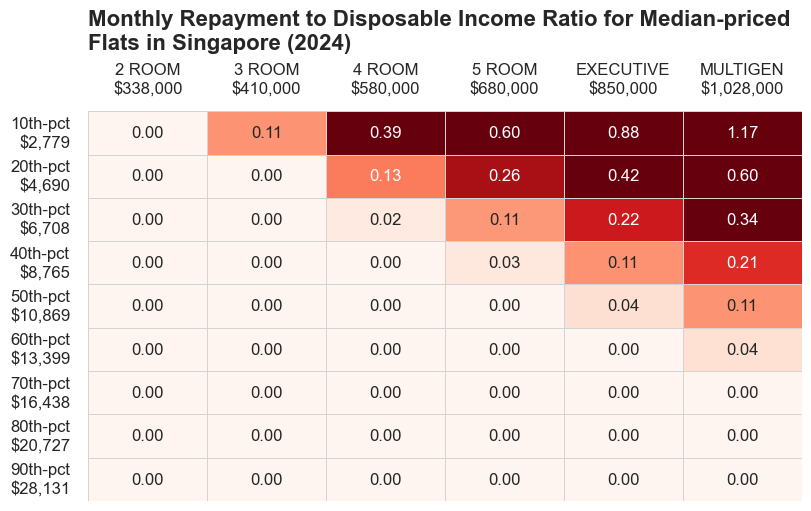

In [70]:
# seagreen_palette = sns.light_palette("seagreen", as_cmap=True)
red_palette = sns.color_palette("Reds", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=red_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=0,
    vmax=0.3,
    annot=labels,
    fmt="",
    cbar=None,
    annot_kws={"ha": "center"},
)

ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)


# Manipulating x labels
flat_type = ["2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTIGEN"]
flat_median_price = flat_median.loc['2 ROOM':, 2024].values
xticklabs = [f"{x}\n${y:,.0f}" for x, y in zip(flat_type, flat_median_price)]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xticklabs, fontsize=12, fontdict={"verticalalignment": "baseline"})
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax.xaxis.set_label_position('top')

yticklabs = [f"{(idx+1)*10}th-pct\n${val:,.0f}"for idx, val in enumerate(household_income_2023)]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(yticklabs, rotation='horizontal', fontsize=12, ha='right')



ax.set_title(
    "Monthly Repayment to Disposable Income Ratio for Median-priced\nFlats in Singapore (2024)",
    size=16,
    loc="left",
    pad=10,
    weight='bold'
);

### How about resale flat prices at the 80th percentile?

In [71]:
flat_percentile_80 = get_x_percentile_flat_price('perc_80')
# flat_percentile_80

In [72]:
household_income_2023 = [2779, 4690, 6708, 8765, 10869, 13399, 16438, 20727, 28131]

df_list = []

for i in ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']:
    income_df = pd.DataFrame(household_income_2023)
    income_df = income_df.rename(columns={0: "household_income"})
    income_df['decile'] = range(1, 10)
    income_df['disposable_income'] = income_df['household_income'] * 0.8 
    income_df["cpf-oa"] = income_df["household_income"] * 0.23
    income_df['flat_type'] = i
    income_df['grants'] = income_df['household_income'].apply(lambda x: housing_grant(i, x))
    income_df['flat_price_80pct'] = income_df['household_income'].apply(lambda x: pct_x_price_of_flat(flat_percentile_80, i, x))
    income_df['flat_price_after_grant'] = income_df['flat_price_80pct'] - income_df['grants']
    income_df['loan'] = income_df['flat_price_after_grant'] * 0.8
    income_df['monthly_mortgage'] = income_df['loan'].apply(lambda x: monthly_amortised_payments(x, 2.6, 25))
    income_df['out_of_pocket'] = (income_df['monthly_mortgage'] - income_df['cpf-oa']).apply(lambda x: x if x > 0 else 0)
    income_df['price_income'] = income_df['out_of_pocket'] / income_df['disposable_income']

    df_list.append(income_df)

affordability_df = pd.concat(df_list, axis=0)
# affordability_df

data_pivot = affordability_df.pivot_table(index=['decile', 'household_income'], columns=['flat_type'], values = 'price_income')
# data_pivot

labels = data_pivot.map(lambda x: f"{x:.2f}")
# labels

Text(0.0, 1.0, 'Monthly Repayment to Disposable Income Ratio for 80th-percentile\n-priced flat in Singapore (2024)')

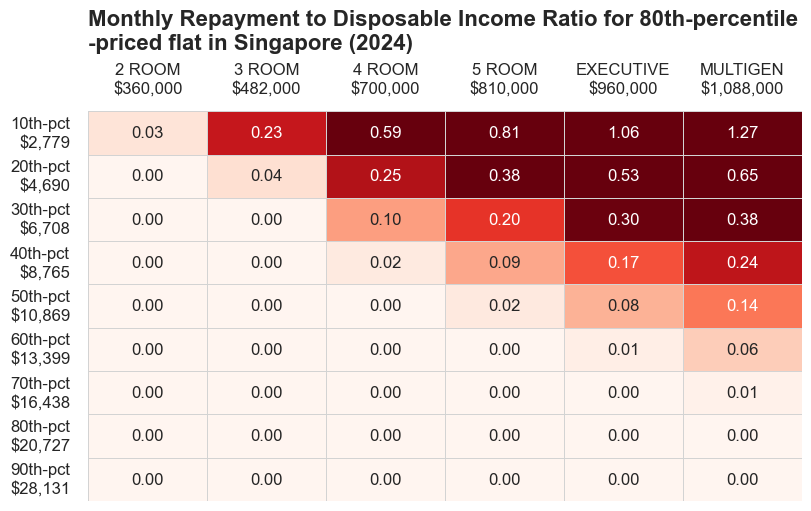

In [73]:
# seagreen_palette = sns.light_palette("seagreen", as_cmap=True)
red_palette = sns.color_palette("Reds", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
sns.heatmap(
    data_pivot,
    # square=True,
    ax=ax,
    cmap=red_palette,
    linewidths=0.5,
    linecolor="lightgrey",
    vmin=0,
    vmax=0.3,
    annot=labels,
    fmt="",
    cbar=None,
    annot_kws={"ha": "center"},
)

ax.grid(None)
ax.set_facecolor("white")
ax.set_xlabel(None)
ax.set_ylabel(None)


# Manipulating x labels
flat_type = ["2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTIGEN"]
flat_median_price = flat_percentile_80.loc["2 ROOM":, 2024].values
xticklabs = [f"{x}\n${y:,.0f}" for x, y in zip(flat_type, flat_median_price)]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xticklabs, fontsize=12, fontdict={"verticalalignment": "baseline"})
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax.xaxis.set_label_position("top")

yticklabs = [
    f"{(idx+1)*10}th-pct\n${val:,.0f}" for idx, val in enumerate(household_income_2023)
]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(yticklabs, rotation="horizontal", fontsize=12, ha="right")

ax.set_title(
    "Monthly Repayment to Disposable Income Ratio for 80th-percentile\n-priced flat in Singapore (2024)",
    size=16,
    loc="left",
    pad=10,
    weight="bold",
)

In [74]:
deciles = range(1, 10)
household_income_2023 = [2779, 4690, 6708, 8765, 10869, 13399, 16438, 20727, 28131]

most_exp_hdb_df = pd.DataFrame(
    {"deciles": deciles, "household_income": household_income_2023}
)
most_exp_hdb_df["disposable_income"] = most_exp_hdb_df["household_income"] * 0.8
most_exp_hdb_df["cpf-oa"] = most_exp_hdb_df["household_income"] * 0.23
most_exp_hdb_df
most_exp_hdb_df['flat_type'] = '5 ROOM'
most_exp_hdb_df['grants'] = most_exp_hdb_df['household_income'].apply(lambda x: housing_grant(i, x))

most_exp_hdb_df['flat_price_median'] = 1588888
most_exp_hdb_df['flat_price_after_grant'] = most_exp_hdb_df['flat_price_median'] - most_exp_hdb_df['grants']
most_exp_hdb_df['loan'] = most_exp_hdb_df['flat_price_after_grant'] * 0.8
most_exp_hdb_df['monthly_mortgage'] = most_exp_hdb_df['loan'].apply(lambda x: monthly_amortised_payments(x, 2.6, 25))
most_exp_hdb_df['out_of_pocket'] = (most_exp_hdb_df['monthly_mortgage'] - most_exp_hdb_df['cpf-oa']).apply(lambda x: x if x > 0 else 0)
most_exp_hdb_df['price_income'] = most_exp_hdb_df['out_of_pocket'] / most_exp_hdb_df['disposable_income']

most_exp_hdb_df

,deciles,household_income,disposable_income,cpf-oa,flat_type,grants,flat_price_median,flat_price_after_grant,loan,monthly_mortgage,out_of_pocket,price_income
0,1,2779,2223.2,639.17,5 ROOM,135000,1588888,1453888,1163110.4,5276.677220,4637.507220,2.085960
1,2,4690,3752.0,1078.70,5 ROOM,115000,1588888,1473888,1179110.4,5349.264341,4270.564341,1.138210
2,3,6708,5366.4,1542.84,5 ROOM,95000,1588888,1493888,1195110.4,5421.851462,3879.011462,0.722833
3,4,8765,7012.0,2015.95,5 ROOM,75000,1588888,1513888,1211110.4,5494.438583,3478.488583,0.496077
4,5,10869,8695.2,2499.87,5 ROOM,70000,1588888,1518888,1215110.4,5512.585364,3012.715364,0.346480
5,6,13399,10719.2,3081.77,5 ROOM,70000,1588888,1518888,1215110.4,5512.585364,2430.815364,0.226772
6,7,16438,13150.4,3780.74,5 ROOM,20000,1588888,1568888,1255110.4,5694.053166,1913.313166,0.145495
7,8,20727,16581.6,4767.21,5 ROOM,20000,1588888,1568888,1255110.4,5694.053166,926.843166,0.055896
8,9,28131,22504.8,6470.13,5 ROOM,20000,1588888,1568888,1255110.4,5694.053166,0.000000,0.000000


A 1.56 million dollar home can only be reasonable afforded by the 9th and 10th deciles.

# __5. Bivariate/ Multi-variate Analyses__

In [ ]:
test = df.copy()

label_cols = ["town", "flat_type", "storey_range", "flat_model"]

le = LabelEncoder()
for i in label_cols:
    test[i] = le.fit_transform(test[i])

In [ ]:
red_blue_diverging = sns.color_palette("coolwarm", as_cmap=True)

corr_data = test.loc[:, ['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_years', 'year', 'x', 'y', 'resale_price']].corr()
labels = corr_data.map(lambda x: f"{x:.2f}")

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
sns.heatmap(corr_data, annot=labels, square=True, fmt='', vmin=-1, vmax=1, cmap=red_blue_diverging, ax=ax)


title="Resale Price is correlated to many variables \nexcept x and y.\nWe need to take note of collinearity arising from\nhigh r^2 between floor area and flat type"
ax.set_title(title, loc='left', weight='bold', size=14)

In [ ]:
sns.pairplot(test, corner=True)

# __5. Machine Learning__